# <b>SC1015 Mini-Project: Predicting Natural Disasters from Increasing Temperatures</b>
### Group 6 Members: Foo Jen Sean, Jeffrey Lim Yi Ren, Karishein Chandran

---

**Step 1 : Choose a dataset according to your interests.**


**Step 2 : Define a problem on the dataset or go with the default.**


**Step 3 : Figure out the proper data representation and features.**


**Step 4 : Perform exploratory data analysis on raw/processed data.**

**Step 5 : Study your chosen model thoroughly before you use it.**

**Step 6 : Set your Model Building process.**


## Installing Libraries and Modules 

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
     |████████████████████████████████| 16.7 MB 48.0 MB/s 
     |████████████████████████████████| 44 kB 1.4 MB/s 


In [ ]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import geopandas as gpd
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# Exploratory Data Analysis (EDA) on Disaster Dataset

```
In this - 
```




## Importing the Dataset


The dataset can be found here: https://www.kaggle.com/brsdincer/all-natural-disasters-19002021-eosdis

In [ ]:
url = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/DISASTERS/1970-2021_DISASTERS.xlsx%20-%20emdat%20data.csv'
disasterData = pd.read_csv(url)
disasterData = disasterData[disasterData.Year <= 2020]
disasterData.head()

Dis No  Year  Seq Glide Disaster Group Disaster Subgroup  \
0  1970-0013-ARG  1970   13   NaN        Natural      Hydrological   
1  1970-0109-AUS  1970  109   NaN        Natural    Meteorological   
2  1970-0044-BEN  1970   44   NaN        Natural      Hydrological   
3  1970-0063-BGD  1970   63   NaN        Natural    Meteorological   
4  1970-0026-BGD  1970   26   NaN        Natural    Meteorological   

  Disaster Type  Disaster Subtype Disaster Subsubtype Event Name  ...  \
0         Flood               NaN                 NaN        NaN  ...   
1         Storm  Tropical cyclone                 NaN        Ada  ...   
2         Flood               NaN                 NaN        NaN  ...   
3         Storm  Tropical cyclone                 NaN        NaN  ...   
4         Storm               NaN                 NaN        NaN  ...   

  No Homeless Total Affected Reconstruction Costs ('000 US$)  \
0         NaN            NaN                             NaN   
1         NaN            NaN                             NaN   
2         NaN            NaN                             NaN   
3         NaN      3648000.0                             NaN   
4         NaN          110.0                             NaN   

  Insured Damages ('000 US$) Total Damages ('000 US$)        CPI Adm Level  \
0                        NaN                  25000.0  15.001282       NaN   
1                        NaN                  72475.0  15.001282       NaN   
2                        NaN                    200.0  15.001282       NaN   
3                        NaN                  86400.0  15.001282       NaN   
4                        NaN                      NaN  15.001282       NaN   

  Admin1 Code Admin2 Code Geo Locations  
0         NaN         NaN           NaN  
1         NaN         NaN           NaN  
2         NaN         NaN           NaN  
3         NaN         NaN           NaN  
4         NaN         NaN           NaN  

[5 rows x 47 columns]

In [ ]:
disasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14329 entries, 0 to 14590
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14329 non-null  object 
 1   Year                             14329 non-null  int64  
 2   Seq                              14329 non-null  int64  
 3   Glide                            1532 non-null   object 
 4   Disaster Group                   14329 non-null  object 
 5   Disaster Subgroup                14329 non-null  object 
 6   Disaster Type                    14329 non-null  object 
 7   Disaster Subtype                 11714 non-null  object 
 8   Disaster Subsubtype              1007 non-null   object 
 9   Event Name                       3583 non-null   object 
 10  Country                          14329 non-null  object 
 11  ISO                              14329 non-null  object 
 12  Region            

In [ ]:
disasterData.describe().round(3)

Year        Seq  Aid Contribution  Dis Mag Value  Start Year  \
count  14329.000  14329.000      6.770000e+02   4.521000e+03   14329.000   
mean    2001.170    734.665      1.254136e+05   5.141762e+04    2001.180   
std       12.337   1918.031      2.997875e+06   3.227576e+05      12.335   
min     1970.000      1.000      1.000000e+00  -5.700000e+01    1970.000   
25%     1993.000    129.000      1.750000e+02   7.000000e+00    1993.000   
50%     2002.000    303.000      7.210000e+02   1.800000e+02    2003.000   
75%     2011.000    503.000      3.511000e+03   1.565000e+04    2011.000   
max     2020.000   9881.000      7.800000e+07   1.302587e+07    2021.000   

       Start Month  Start Day   End Year  End Month    End Day  Total Deaths  \
count    14063.000  11279.000  14329.000  13780.000  11350.000     10008.000   
mean         6.444     15.221   2001.231      6.579     15.783       367.740   
std          3.404      8.968     12.338      3.361      8.876      6556.497   
min          1.000      1.000   1970.000      1.000      1.000         1.000   
25%          4.000      7.000   1993.000      4.000      8.000         5.000   
50%          7.000     15.000   2003.000      7.000     16.000        16.000   
75%          9.000     23.000   2011.000      9.000     24.000        50.000   
max         12.000     31.000   2021.000     12.000     31.000    300000.000   

        No Injured   No Affected   No Homeless  Total Affected  \
count     3568.000  8.606000e+03  2.225000e+03    1.077100e+04   
mean      2518.277  9.065141e+05  7.296721e+04    7.402096e+05   
std      34396.323  8.797970e+06  5.299228e+05    7.946936e+06   
min          1.000  1.000000e+00  6.000000e+00    1.000000e+00   
25%         13.000  1.200000e+03  5.300000e+02    6.500000e+02   
50%         50.000  1.000000e+04  3.000000e+03    5.926000e+03   
75%        200.000  9.000000e+04  1.648700e+04    5.700000e+04   
max    1800000.000  3.300000e+08  1.585000e+07    3.300000e+08   

       Reconstruction Costs ('000 US$)  Insured Damages ('000 US$)  \
count                     3.100000e+01                1.090000e+03   
mean                      2.392251e+06                7.972982e+05   
std                       5.229397e+06                3.062718e+06   
min                       8.400000e+01                3.400000e+01   
25%                       1.200000e+04                5.000000e+04   
50%                       1.940000e+05                1.700000e+05   
75%                       1.520376e+06                5.000000e+05   
max                       2.500000e+07                6.000000e+07   

       Total Damages ('000 US$)        CPI  
count              4.783000e+03  14329.000  
mean               7.673862e+05     68.763  
std                4.915721e+06     21.429  
min                2.000000e+00     15.001  
25%                1.000000e+04     55.816  
50%                7.000000e+04     69.500  
75%                3.500000e+05     86.912  
max                2.100000e+08    100.000

Hydrological         5815
Meteorological       4504
Biological           1525
Geophysical          1373
Climatological       1111
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


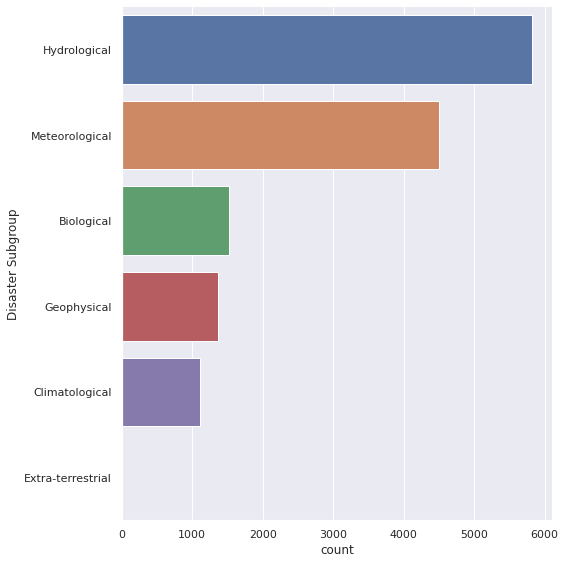

In [ ]:
print(disasterData["Disaster Subgroup"].value_counts())
sb.catplot(y = "Disaster Subgroup", data = disasterData, kind = "count", 
           order = disasterData["Disaster Subgroup"].value_counts().index, height = 8)

In [ ]:
disasterData["Year"].value_counts().sort_index()

1970     82
1971     63
1972     63
1973     65
1974     72
1975     67
1976     99
1977    141
1978    137
1979    122
1980    144
1981    146
1982    150
1983    206
1984    156
1985    175
1986    174
1987    227
1988    234
1989    189
1990    303
1991    266
1992    232
1993    267
1994    255
1995    277
1996    273
1997    323
1998    363
1999    416
2000    523
2001    447
2002    532
2003    392
2004    405
2005    498
2006    446
2007    449
2008    400
2009    384
2010    441
2011    357
2012    370
2013    353
2014    348
2015    398
2016    350
2017    371
2018    338
2019    442
2020    398
Name: Year, dtype: int64

In [ ]:
print(disasterData["Disaster Type"].value_counts())

Flood                   5112
Storm                   3922
Epidemic                1431
Earthquake              1118
Landslide                703
Drought                  675
Extreme temperature      582
Wildfire                 436
Volcanic activity        214
Insect infestation        93
Mass movement (dry)       41
Impact                     1
Animal accident            1
Name: Disaster Type, dtype: int64


In [ ]:
averageDeaths = disasterData['Total Deaths'].mean()
averageAffected = disasterData["Total Affected"].mean()
averageDamages = disasterData["Total Damages ('000 US$)"].mean()
avgDeathAffectedDamages = pd.DataFrame([[int(averageDeaths), \
int(averageAffected), "USD $ " + str(round(averageDamages, 2))]], \
columns=["Average Deaths", "Average Affected", "Average Damages"]);
avgDeathAffectedDamages = avgDeathAffectedDamages.rename(index={0: 'Value'})
avgDeathAffectedDamages

Average Deaths  Average Affected  Average Damages
Value             367            740209  USD $ 767386.15

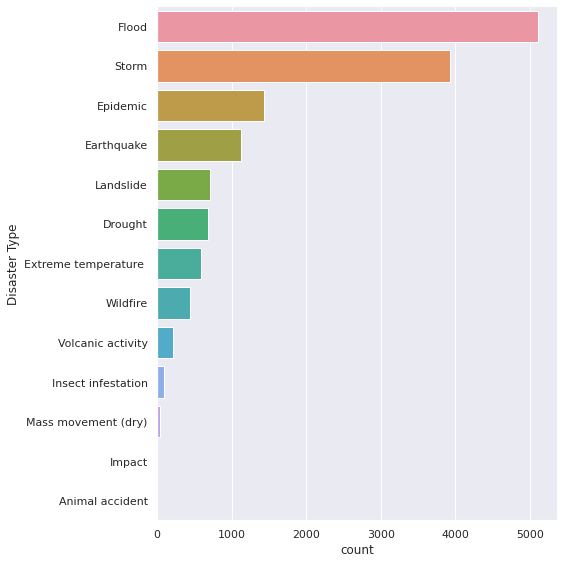

In [ ]:
sb.catplot(y = "Disaster Type", data = disasterData, kind = "count", 
           order = disasterData["Disaster Type"].value_counts().index, height = 8)

The map below displays the type of natural disasters and where it occurs the most in different parts of the world from 1970 - 2020

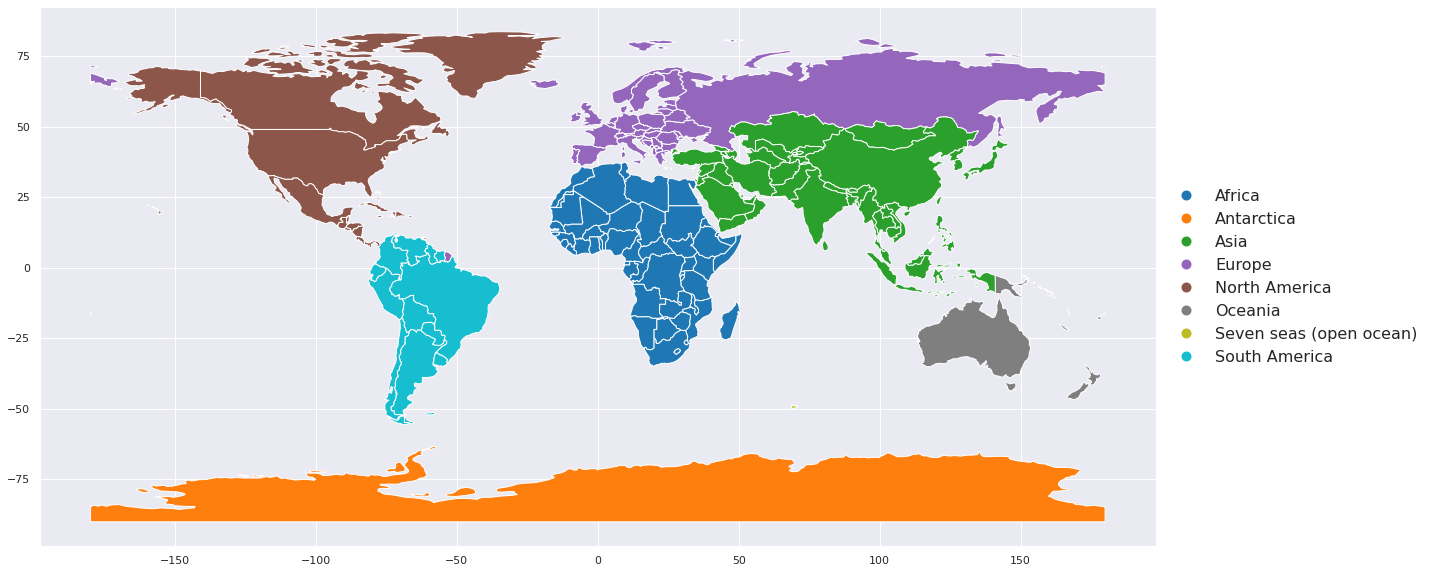

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(column = 'continent', figsize = (20,20), legend = True, 
           legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fontsize':16, 'frameon': False})

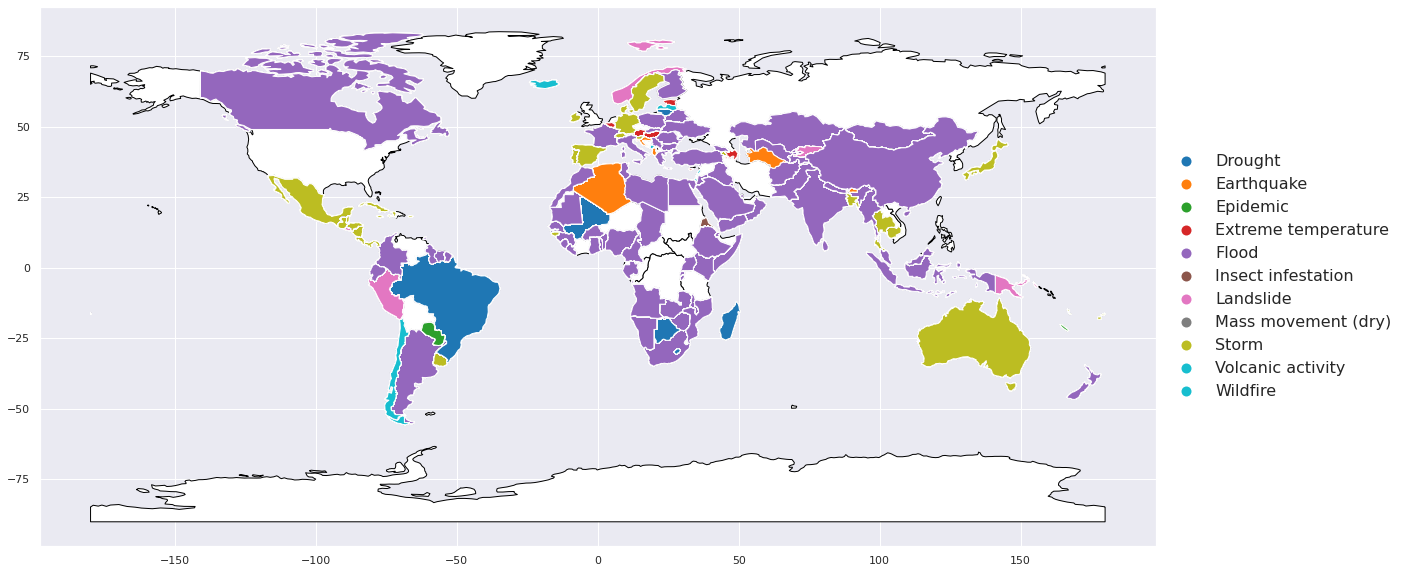

In [ ]:
# create new data frame to only contain countries and the type of natural disasters that occur
countries = disasterData[['Country', 'Disaster Type']].copy()
countries.rename(columns = {'Country':'name'}, inplace = True)

# combine the countries dataframe with the world geopanda dataframe
merged = world.merge(countries, on='name', how = "left")

# plotting the data on the world map
fig, ax1 = plt.subplots(figsize=(20, 20))

# plot world map as base
world.plot(ax=ax1, color = 'white', edgecolor='black')

# plot the natural disasters location above world map
merged.plot(column = 'Disaster Type', ax=ax1, legend = True,
            legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fontsize':16, 'frameon': False})

In [ ]:
disasterCountPerYear = pd.DataFrame(disasterData["Year"].value_counts().rename_axis('Year').reset_index(name='No. Of Disasters'))
disasterCountPerYear.set_index("Year", inplace = True)
disasterCountPerYear.sort_index(inplace = True)
disasterCountPerYear.head()

No. Of Disasters
Year                  
1970                82
1971                63
1972                63
1973                65
1974                72

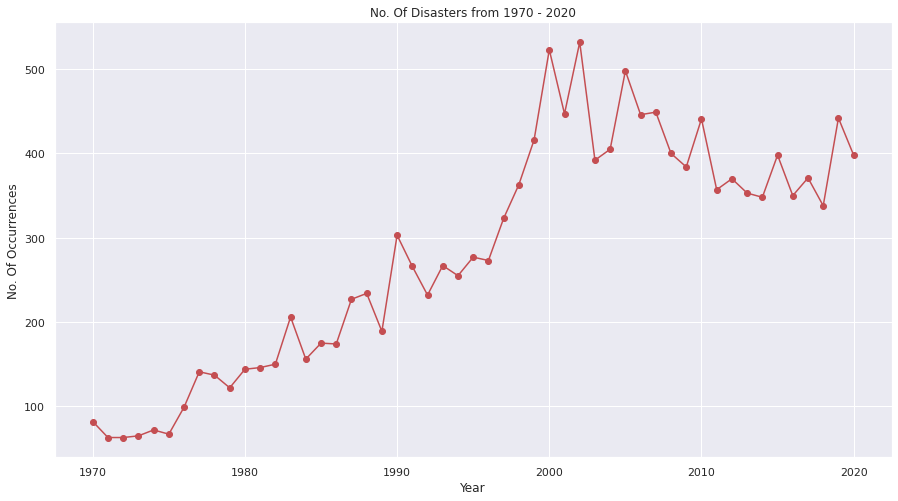

In [ ]:
plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2020")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r', marker="o")

plt.show()

In [ ]:
disasterTypesPerYear = pd.DataFrame(disasterData[["Year", "Disaster Type"]].value_counts().reset_index(name='No. Of Disasters'))
disasterTypesPerYear.head()

Year Disaster Type  No. Of Disasters
0  2006         Flood               226
1  2007         Flood               218
2  2020         Flood               201
3  2019         Flood               196
4  2005         Flood               193

In [ ]:
columnHeaders = disasterTypesPerYear["Disaster Type"].unique().tolist()
columnHeaders.insert(0, "Year")
rowHeaders = disasterTypesPerYear["Year"].unique().tolist()
yearDisasterMatrix = pd.DataFrame(columns=columnHeaders)

for i in range(len(rowHeaders)):
  yearDisasterMatrix.loc[i] = [rowHeaders[i], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # set all values to 0 first

yearDisasterMatrix.set_index("Year", inplace = True)
yearDisasterMatrix.sort_index(inplace = True)

for row in disasterTypesPerYear.iterrows():
  yearDisasterMatrix.at[row[1][0], row[1][1]] = row[1][2] # add data from previous dataframe
    
yearDisasterMatrix.drop(columns=["Animal accident", "Impact"], inplace=True)
yearDisasterMatrix

Flood Storm Epidemic Extreme temperature  Earthquake Landslide Wildfire  \
Year                                                                           
1970    31    24        4                    0         12         6        3   
1971    15    22        2                    1          6         5        2   
1972    15    26        1                    2          7         5        3   
1973    20    22        0                    3          8         5        3   
1974    19    28        2                    0          6        10        3   
1975    18    28        1                    3          5         5        2   
1976    17    36        3                    0         21         6        1   
1977    48    32       22                    1         15         3        2   
1978    47    42       21                    1          9         2        3   
1979    34    31        3                    4         23         7        4   
1980    39    42        8                    3         17         4        4   
1981    43    50        5                    2         15         8        4   
1982    48    52        7                    3         15        12        3   
1983    49    59        7                    2         25        16       12   
1984    47    57       12                    1         13         6        7   
1985    58    51       13                    8         17         6       13   
1986    50    56       11                    2         21         9        6   
1987    68    58       25                    6         15        13        8   
1988    76    60       20                    6         15        15        0   
1989    46    73       16                    5         19        15        3   
1990    60   137       18                   13         42         5        4   
1991    77    66       43                    8         29         9        8   
1992    59    76       28                    7         25         8        8   
1993    84   108        4                    4         20        24        2   
1994    88    81       10                    9         25        11       13   
1995    94    81       25                   13         26        16        7   
1996    92    77       45                    5         13        24        5   
1997    95    79       62                   13         23        13       16   
1998    94    88       74                   12         30        22       18   
1999   122   106       76                    8         33        18       22   
2000   157   102      113                   30         30        28       30   
2001   157   105       69                   23         25        24       14   
2002   172   122      112                   15         37        20       22   
2003   158    86       32                   25         40        21       14   
2004   128   124       43                   16         42        15        8   
2005   193   130       56                   40         25        13       13   
2006   226    76       54                   14         24        20        9   
2007   218   105       35                   25         21        10       18   
2008   165   111       42                   16         23        12        5   
2009   151    87       44                   20         22        29        9   
2010   184    94       44                   28         24        32        7   
2011   156    84       24                   16         30        17        8   
2012   136    91       25                   52         27        13        6   
2013   148   105       23                   13         29        11       10   
2014   137    99       23                   17         26        15        4   
2015   161   121       14                   12         23        20       13   
2016   160    86       25                   12         30        13       10   
2017   127   130       27                   10         22        25       15   
2018 

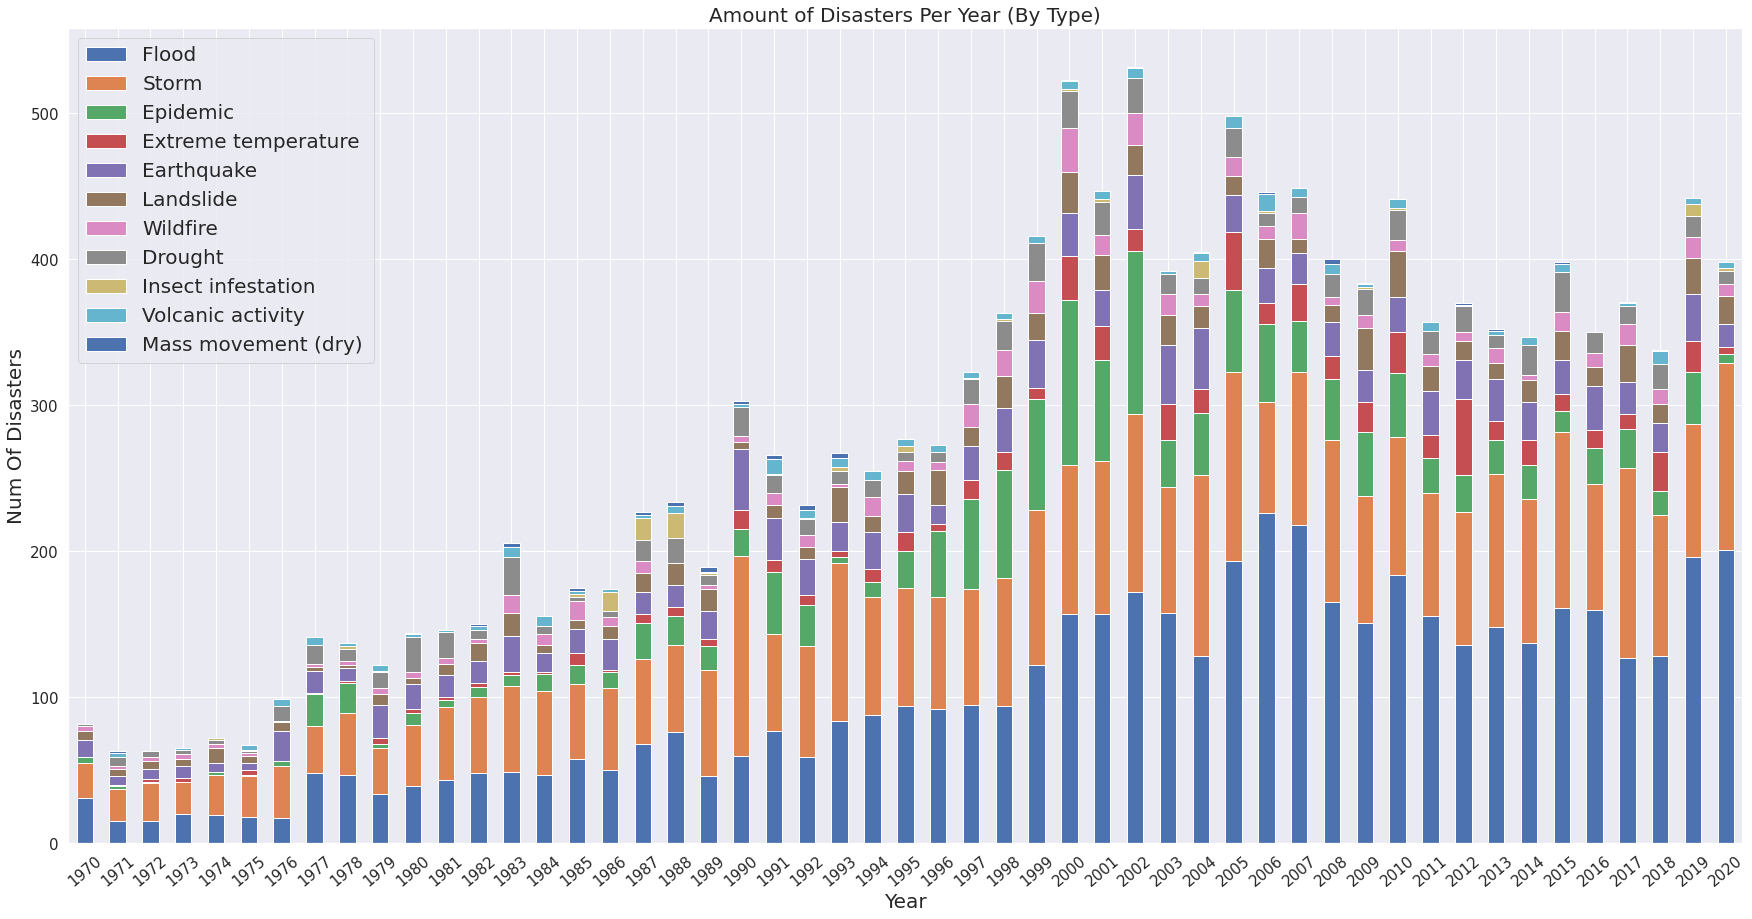

In [ ]:
yearDisasterMatrix.plot(kind="bar", stacked=True, figsize=(30,15), fontsize=15, rot=40)
plt.title("Amount of Disasters Per Year (By Type)", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Num Of Disasters", fontsize=20)
plt.legend(fontsize=20)

In [ ]:
# disasterData["Disaster Type"] != "Animal accident"
disasterData = disasterData[disasterData["Disaster Type"] != "Animal accident"]
disasterData = disasterData[disasterData["Disaster Type"] != "Impact"]
disasterData

Dis No  Year  Seq           Glide Disaster Group  \
0      1970-0013-ARG  1970   13             NaN        Natural   
1      1970-0109-AUS  1970  109             NaN        Natural   
2      1970-0044-BEN  1970   44             NaN        Natural   
3      1970-0063-BGD  1970   63             NaN        Natural   
4      1970-0026-BGD  1970   26             NaN        Natural   
...              ...   ...  ...             ...            ...   
14586  2020-0175-COD  2020  175             NaN        Natural   
14587  2020-0031-ZMB  2020   31             NaN        Natural   
14588  2020-0110-ZMB  2020  110             NaN        Natural   
14589  2020-0131-TLS  2020  131             NaN        Natural   
14590  2020-0362-SSD  2020  362  FL-2019-000062        Natural   

      Disaster Subgroup Disaster Type  Disaster Subtype Disaster Subsubtype  \
0          Hydrological         Flood               NaN                 NaN   
1        Meteorological         Storm  Tropical cyclone                 NaN   
2          Hydrological         Flood               NaN                 NaN   
3        Meteorological         Storm  Tropical cyclone                 NaN   
4        Meteorological         Storm               NaN                 NaN   
...                 ...           ...               ...                 ...   
14586      Hydrological         Flood               NaN                 NaN   
14587      Hydrological         Flood               NaN                 NaN   
14588      Hydrological         Flood               NaN                 NaN   
14589      Hydrological         Flood    Riverine flood                 NaN   
14590      Hydrological         Flood               NaN                 NaN   

      Event Name  ... No Homeless Total Affected  \
0            NaN  ...         NaN            NaN   
1            Ada  ...         NaN            NaN   
2            NaN  ...         NaN            NaN   
3            NaN  ...         NaN      3648000.0   
4            NaN  ...         NaN          110.0   
...          ...  ...         ...            ...   
14586        NaN  ...         NaN        92580.0   
14587        NaN  ...         NaN         1500.0   
14588        NaN  ...         NaN       700000.0   
14589        NaN  ...         NaN         9131.0   
14590        NaN  ...         NaN      1042000.0   

      Reconstruction Costs ('000 US$) Insured Damages ('000 US$)  \
0                                 NaN                        NaN   
1                                 NaN                        NaN   
2                                 NaN                        NaN   
3                                 NaN                        NaN   
4                                 NaN                        NaN   
...                               ...                        ...   
14586                             NaN                        NaN   
14587                             NaN                        NaN   
14588                             NaN                        NaN   
14589                             NaN                        NaN   
14590                             NaN                        NaN   

      Total Damages ('000 US$)         CPI Adm Level  \
0                      25000.0   15.001282       NaN   
1                      72475.0   15.001282       NaN   
2                        200.0   15.001282       NaN   
3                      86400.0   15.001282       NaN   
4                          NaN   15.001282       NaN   
...                        ...         ...       ...   
14586                      NaN  100.000000         2   
14587                      NaN  100.000000         2   
14588                      NaN  100.000000         2   
14589                  20000.0  100.000000         2   
14590                      NaN  100.000000       1;2   

                               Admin1 Code              Admin2 Code  \
0                                      NaN                      NaN   
1              

In [ ]:
disasterCountPerYear = pd.DataFrame(disasterData["Year"].value_counts().rename_axis('Year').reset_index(name='No. Of Disasters'))
disasterCountPerYear.set_index("Year", inplace = True)
disasterCountPerYear.sort_index(inplace = True)
disasterCountPerYear.head()

No. Of Disasters
Year                  
1970                82
1971                63
1972                63
1973                65
1974                72

**Observations**

1. After performing EDA on disaster dataset, it is noticeable that both flood and storm disasters have the highest number of occurences in a year.

2. There is a upward trend in the occurences of disasters from 1970 to 2020

3. Flooding occurs mainly in the Asian and African Region, where the weather is generally more humid and warm

4. We are only interested in the disaster occurence each year as the rest of the variables are irrelevant at this point in time of our project

5. We have also perform data cleaning on this dataset to by creating another dataframe(yearDisasterMatrix) with the combined of all the occurence of natural disasters in that year and set the years as index, and sorting it by year

6. We have also remove animal accident, and impact from this disaster dataset as we believe that these are not affected by global warming, hence considered as outliers

**Conclusion**  
The frequency of natural disasters occuring is increasing over the years. Flood is the most frequent disaster. 

# Exploratory Data Analysis (EDA) on Temperature Dataset

Dataset can be found here: https://www.fao.org/faostat/en/#data/ET/metadata

## Importing the Dataset

In [ ]:
link1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/climate-change-temperature.csv'
link2 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/co2_mm_mlo.csv'
link3 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/ch4_mm_gl.csv'
link4 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/n2o_mm_gl.csv'
tempData = pd.read_csv(link1)
co2Data = pd.read_csv(link2)
ch4Data = pd.read_csv(link3)
n2oData = pd.read_csv(link4)
tempData

Entity      Code         Day  temperature_anomaly
0     Northern Hemisphere       NaN  1880-01-15                -0.35
1     Northern Hemisphere       NaN  1880-02-15                -0.51
2     Northern Hemisphere       NaN  1880-03-15                -0.23
3     Northern Hemisphere       NaN  1880-04-15                -0.30
4     Northern Hemisphere       NaN  1880-05-15                -0.06
...                   ...       ...         ...                  ...
5110                World  OWID_WRL  2021-09-15                 0.92
5111                World  OWID_WRL  2021-10-15                 0.99
5112                World  OWID_WRL  2021-11-15                 0.93
5113                World  OWID_WRL  2021-12-15                 0.86
5114                World  OWID_WRL  2022-01-15                 0.93

[5115 rows x 4 columns]

## Temperature (°C)

In [ ]:
# link1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/climate-change-temperature.csv'
tempData = pd.read_csv(link1)
tempData = tempData[tempData.Entity == 'World']

tempData = tempData.set_index('Day')
tempData.index = tempData.index.astype(str)
tempData.index = pd.DatetimeIndex(tempData.index).to_period("M")
tempData.index = tempData.index.to_timestamp()

In [ ]:
tempData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1705 entries, 1880-01-01 to 2022-01-01
Freq: MS
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               1705 non-null   object 
 1   Code                 1705 non-null   object 
 2   temperature_anomaly  1705 non-null   float64
dtypes: float64(1), object(2)
memory usage: 53.3+ KB


In [ ]:
tempData.describe()


temperature_anomaly
count          1705.000000
mean              0.055801
std               0.376738
min              -0.810000
25%              -0.220000
50%              -0.040000
75%               0.270000
max               1.370000

In [ ]:
tempData = tempData[tempData.Entity == 'World']
tempData.head()

Entity      Code  temperature_anomaly
Day                                             
1880-01-01  World  OWID_WRL                -0.17
1880-02-01  World  OWID_WRL                -0.23
1880-03-01  World  OWID_WRL                -0.08
1880-04-01  World  OWID_WRL                -0.15
1880-05-01  World  OWID_WRL                -0.09

In [ ]:
'''tempDict = {}
for row in tempData.iterrows():
  if int(row[1][2].split("-")[0]) >= 1970 and int(row[1][2].split("-")[0]) <= 2020:
    if int(row[1][2].split("-")[0]) not in tempDict:
      tempDict[int(row[1][2].split("-")[0])] = float(row[1][3])
    else:
      tempDict[int(row[1][2].split("-")[0])] += float(row[1][3])

for key in tempDict:
  tempDict[key] = tempDict[key] / 12

tempData = pd.DataFrame(tempDict.items(), columns=['Year', 'Temperature Change'])
tempData.set_index("Year", inplace=True)
tempData.index = tempData.index.astype(str)
tempData.index = pd.DatetimeIndex(tempData.index).to_period("Y")
tempData.index = tempData.index.to_timestamp()
tempData'''

'tempDict = {}\nfor row in tempData.iterrows():\n  if int(row[1][2].split("-")[0]) >= 1970 and int(row[1][2].split("-")[0]) <= 2020:\n    if int(row[1][2].split("-")[0]) not in tempDict:\n      tempDict[int(row[1][2].split("-")[0])] = float(row[1][3])\n    else:\n      tempDict[int(row[1][2].split("-")[0])] += float(row[1][3])\n\nfor key in tempDict:\n  tempDict[key] = tempDict[key] / 12\n\ntempData = pd.DataFrame(tempDict.items(), columns=[\'Year\', \'Temperature Change\'])\ntempData.set_index("Year", inplace=True)\ntempData.index = tempData.index.astype(str)\ntempData.index = pd.DatetimeIndex(tempData.index).to_period("Y")\ntempData.index = tempData.index.to_timestamp()\ntempData'

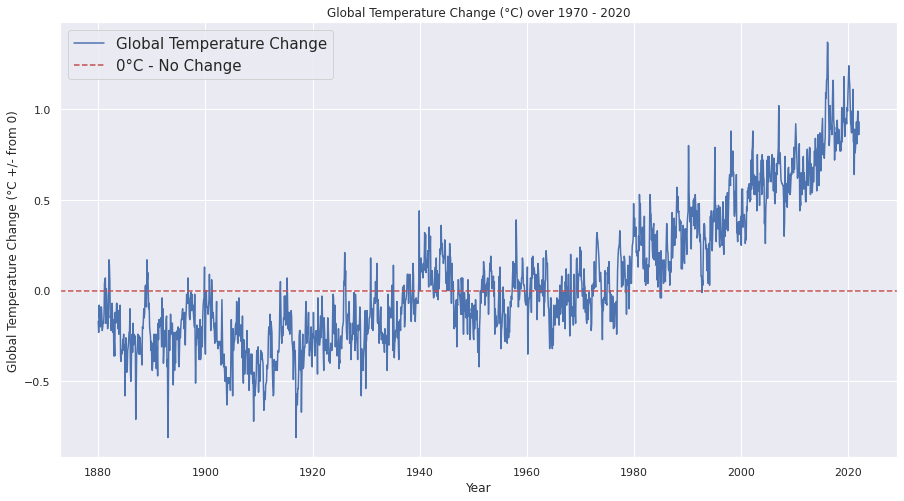

In [ ]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 8))

plt.title("Global Temperature Change (°C) over 1970 - 2020")
plt.xlabel('Year')
plt.ylabel('Global Temperature Change (°C +/- from 0)')
# tempData["Temperature Change"].plot(color="b", legend=True)
plt.plot(tempData["temperature_anomaly"], color="b")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(["Global Temperature Change", "0°C - No Change"], loc=0, prop={"size":15})

plt.show()

In [ ]:
disasterCountPerYear.index = pd.to_datetime(disasterCountPerYear.index, format='%Y')
disasterCountPerYear

No. Of Disasters
Year                        
1970-01-01                82
1971-01-01                63
1972-01-01                63
1973-01-01                65
1974-01-01                72
1975-01-01                67
1976-01-01                99
1977-01-01               141
1978-01-01               137
1979-01-01               122
1980-01-01               144
1981-01-01               146
1982-01-01               150
1983-01-01               206
1984-01-01               156
1985-01-01               175
1986-01-01               174
1987-01-01               227
1988-01-01               234
1989-01-01               189
1990-01-01               303
1991-01-01               266
1992-01-01               232
1993-01-01               267
1994-01-01               255
1995-01-01               277
1996-01-01               273
1997-01-01               323
1998-01-01               363
1999-01-01               416
2000-01-01               523
2001-01-01               447
2002-01-01               532
2003-01-01               392
2004-01-01               405
2005-01-01               498
2006-01-01               446
2007-01-01               449
2008-01-01               400
2009-01-01               384
2010-01-01               441
2011-01-01               357
2012-01-01               370
2013-01-01               352
2014-01-01               347
2015-01-01               398
2016-01-01               350
2017-01-01               371
2018-01-01               338
2019-01-01               442
2020-01-01               398

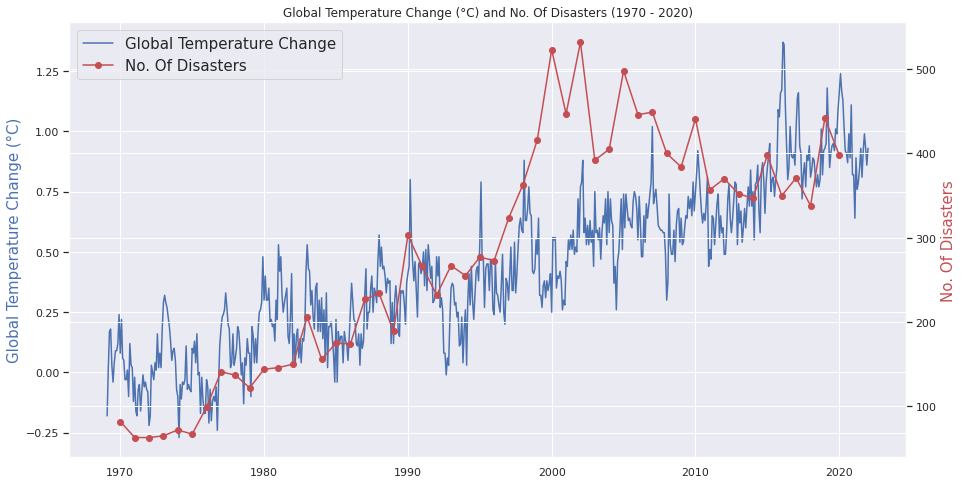

In [ ]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 8))
ax2 = ax.twinx()
temp_line, = ax.plot(tempData["temperature_anomaly"].iloc[tempData.index > "1969"], color="b")
disaster_line, = ax2.plot(disasterCountPerYear['No. Of Disasters'], 'r', marker="o")

plt.title("Global Temperature Change (°C) and No. Of Disasters (1970 - 2020)")
plt.xlabel('Year')
plt.ylabel('Global Temperature Change (°C +/- from 0)')
plt.legend((temp_line, disaster_line),["Global Temperature Change", "No. Of Disasters"], loc=2, prop={"size":15})
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('No. Of Disasters', fontsize = 15, color = 'r')

plt.show()

# Exploratory Data Anaysis (EDA) on Greenhouse gases datasets 

## Carbon Dioxide (CO2)

In [ ]:
co2Data['Date'] = pd.to_datetime(co2Data[['year', 'month']].assign(Day=15))
co2Data = co2Data.set_index('Date').to_period('M')
co2Data.index = co2Data.index.to_timestamp()
co2Data.head()

year  month  decimal date  average  interpolated  trend  ndays  \
Date                                                                         
1958-03-01  1958      3     1958.2027   315.70        314.43     -1  -9.99   
1958-04-01  1958      4     1958.2877   317.45        315.16     -1  -9.99   
1958-05-01  1958      5     1958.3699   317.51        314.71     -1  -9.99   
1958-06-01  1958      6     1958.4548   317.24        315.14     -1  -9.99   
1958-07-01  1958      7     1958.5370   315.86        315.18     -1  -9.99   

            Unnamed: 7  
Date                    
1958-03-01       -0.99  
1958-04-01       -0.99  
1958-05-01       -0.99  
1958-06-01       -0.99  
1958-07-01       -0.99

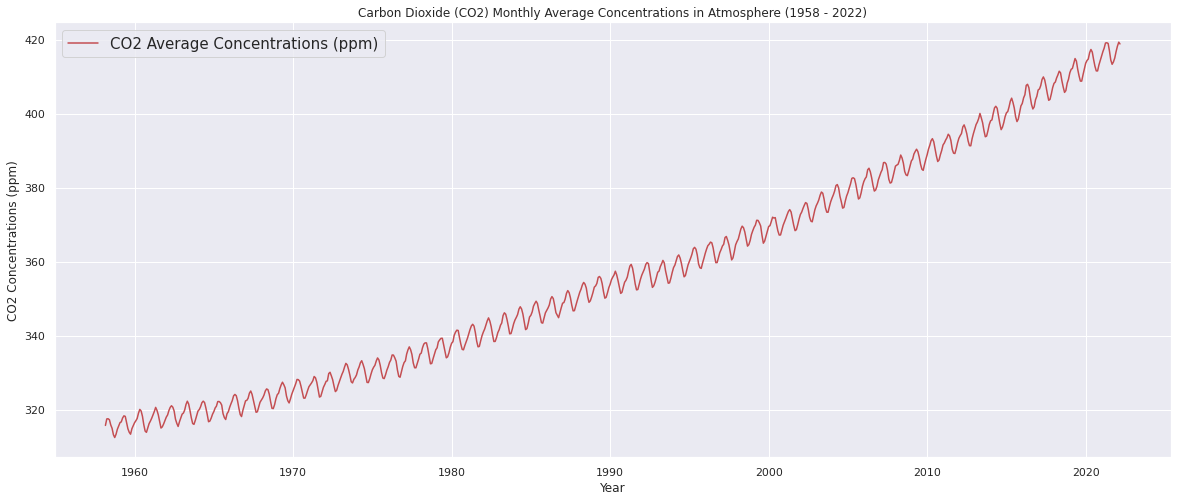

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Carbon Dioxide (CO2) Monthly Average Concentrations in Atmosphere (1958 - 2022)")
plt.xlabel("Year")
plt.ylabel("CO2 Concentrations (ppm)")

co2_line = plt.plot(co2Data["average"], color="r")
plt.legend((co2_line), ("CO2 Average Concentrations (ppm)",), loc=0, prop={"size":15})
# plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,280), xytext=(1760,300), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()

## Methane (CH4)

In [ ]:
ch4Data['Date'] = pd.to_datetime(ch4Data[['year', 'month']].assign(Day=15))
ch4Data = ch4Data.set_index('Date').to_period('M')
ch4Data.index = ch4Data.index.to_timestamp()
ch4Data.head()

year  month   decimal  average  average_unc   trend  trend_unc
Date                                                                      
1983-07-01  1983      7  1983.542   1625.9          2.3  1635.1        1.5
1983-08-01  1983      8  1983.625   1628.1          2.9  1635.6        1.4
1983-09-01  1983      9  1983.708   1638.4          2.3  1636.1        1.3
1983-10-01  1983     10  1983.792   1644.8          1.4  1636.7        1.2
1983-11-01  1983     11  1983.875   1642.6          0.8  1637.4        1.2

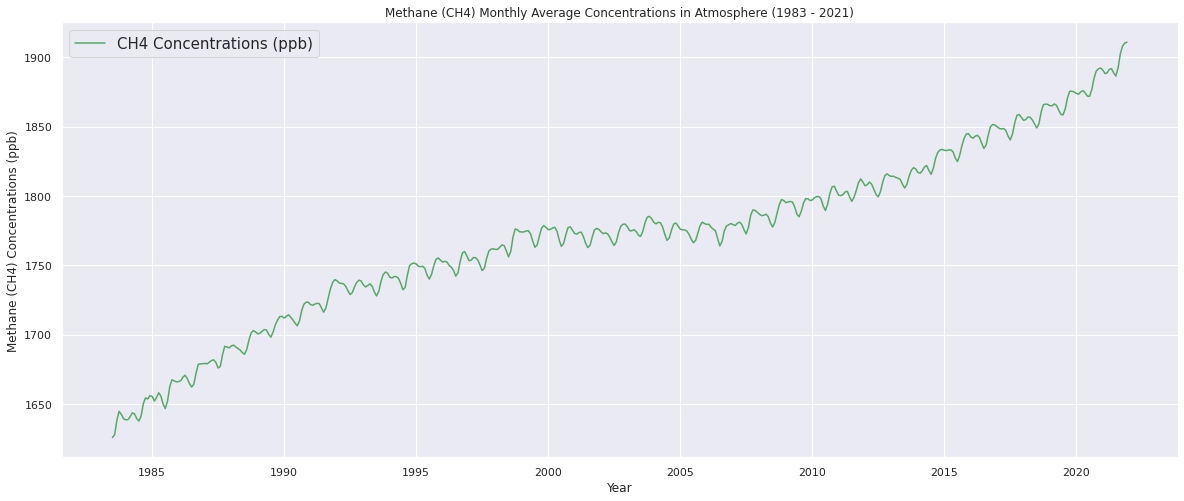

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Methane (CH4) Monthly Average Concentrations in Atmosphere (1983 - 2021)")
plt.xlabel('Year')
plt.ylabel('Methane (CH4) Concentrations (ppb)')
ch4_line = plt.plot(ch4Data['average'], color='g')
plt.legend((ch4_line), ("CH4 Concentrations (ppb)",), loc=0, prop={"size":15})
# plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,730), xytext=(1760,900), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()

## Nitrous Oxide (N2O)

In [ ]:
n2oData['Date'] = pd.to_datetime(n2oData[['year', 'month']].assign(Day=15))
n2oData = n2oData.set_index('Date').to_period('M')
n2oData.index = n2oData.index.to_timestamp()
n2oData.head()

year  month   decimal  average  average_unc  trend  trend_unc
Date                                                                     
2001-01-01  2001      1  2001.042    316.3          0.2  316.0        0.1
2001-02-01  2001      2  2001.125    316.3          0.2  316.1        0.1
2001-03-01  2001      3  2001.208    316.2          0.2  316.2        0.1
2001-04-01  2001      4  2001.292    316.1          0.1  316.2        0.1
2001-05-01  2001      5  2001.375    316.1          0.1  316.3        0.1

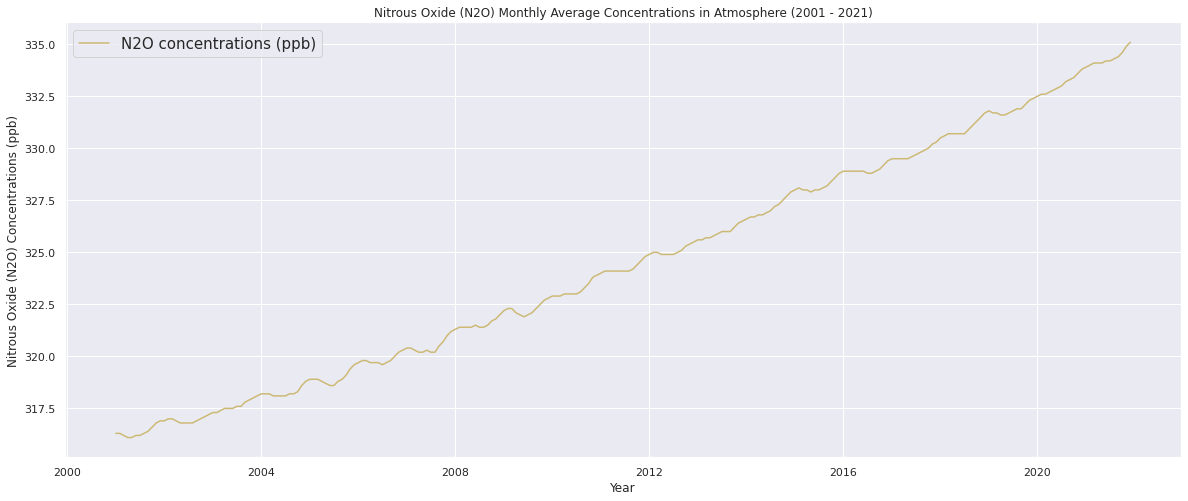

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Nitrous Oxide (N2O) Monthly Average Concentrations in Atmosphere (2001 - 2021)")
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide (N2O) Concentrations (ppb)')
n2o_line = plt.plot(n2oData['average'], color='y')
plt.legend((n2o_line), ("N2O concentrations (ppb)",), loc=0, prop={"size":15})
#plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,272), xytext=(1760,280), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.show()

## CO2 and Temperature Change

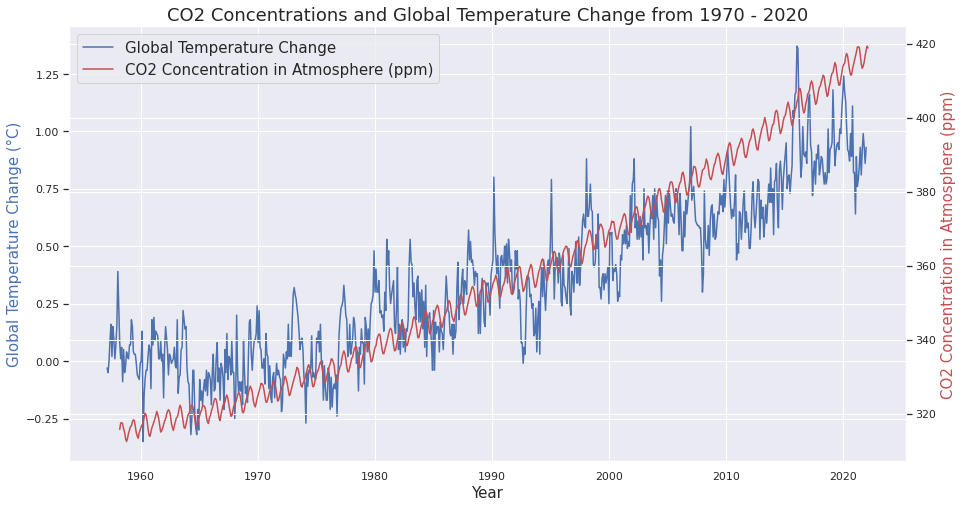

In [ ]:
# co2Data
# co2Data["average"]

fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "1957"], color='b', label="Temperature Change")
co2_line, = ax2.plot(co2Data["average"], color="r")

plt.title('CO2 Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, co2_line), ("Global Temperature Change","CO2 Concentration in Atmosphere (ppm)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('CO2 Concentration in Atmosphere (ppm)', fontsize = 15, color = 'r')

plt.show()

## CH4 and Temperature Change

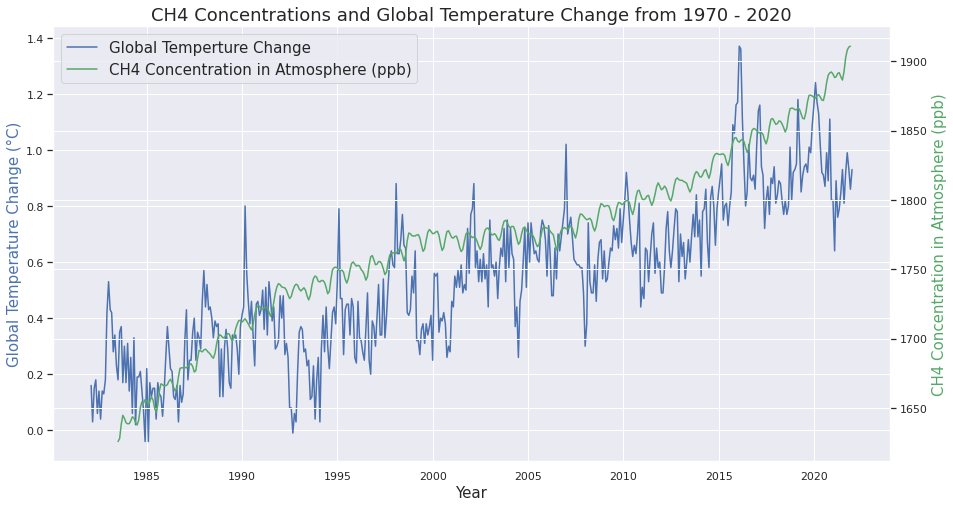

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "1982"], color='b', label="Temperature Change")
ch4_line, = ax2.plot(ch4Data["average"], color="g")

plt.title('CH4 Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, ch4_line), ("Global Temperture Change", "CH4 Concentration in Atmosphere (ppb)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('CH4 Concentration in Atmosphere (ppb)', fontsize = 15, color = 'g')

plt.show()

## N2O and Temperature Change

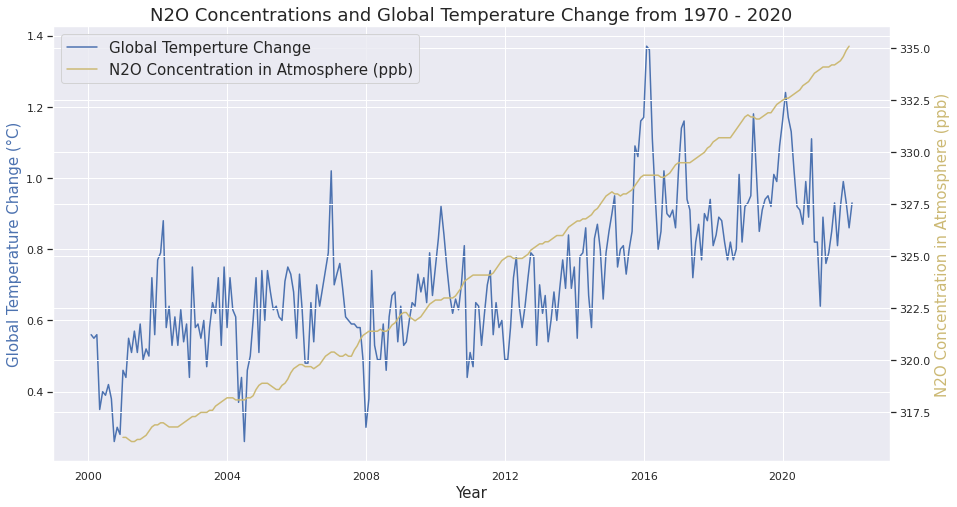

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "2000"], color='b', label="Temperature Change")
n2o_line, = ax2.plot(n2oData["average"], color="y")

plt.title('N2O Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, n2o_line), ("Global Temperture Change","N2O Concentration in Atmosphere (ppb)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('N2O Concentration in Atmosphere (ppb)', fontsize = 15, color = 'y')

plt.show()

## Correlations between Greenhouse Gases (CO2, CH4, N2O) and temperature

In [ ]:
corrData = pd.concat([tempData["temperature_anomaly"], co2Data["average"], ch4Data["average"], n2oData["average"]], axis=1)
corrData.set_axis(["Global Temperature Change","Carbon Dioxide (CO2)", "Methane (CH4)", "Nitrous Oxide (N2O)"], axis=1, inplace=True)
corrData.corr()

Global Temperature Change  Carbon Dioxide (CO2)  \
Global Temperature Change                   1.000000              0.914129   
Carbon Dioxide (CO2)                        0.914129              1.000000   
Methane (CH4)                               0.832289              0.955747   
Nitrous Oxide (N2O)                         0.699443              0.985570   

                           Methane (CH4)  Nitrous Oxide (N2O)  
Global Temperature Change       0.832289             0.699443  
Carbon Dioxide (CO2)            0.955747             0.985570  
Methane (CH4)                   1.000000             0.973205  
Nitrous Oxide (N2O)             0.973205             1.000000

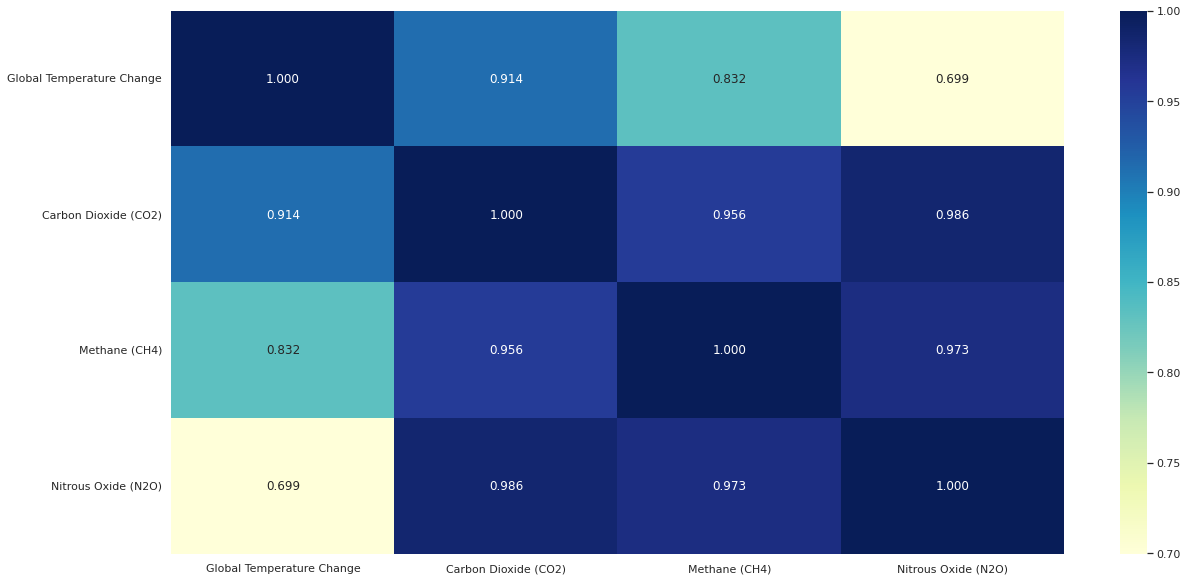

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sb.heatmap(corrData.corr(), annot=True, fmt=".3f", cmap="YlGnBu")


**From this heatmap, we can make a few observations.**

1. There is a strong positive correlation (r > 0.8) for Methane(CH4), Carbon Dioxide(CO2) with Global Temperature Change. 

2. C02 have the strongest correlation with temperature change at r = 0.914 as compared to CH4 and N20

3. N20 have the weakest correlation with temperature change agt r = 0.699 as compared to C02 and N20

**Conclusion**

All three greenhouse gases have high positive correlation with temperature.

  

# Prediction and Modelling
---
We will be using ARIMA model to do our time series forecasting prediction. 

Why: As our goal is to make forecasting predictions on a time series data, we have decided to use ARIMA model to do the predictions. 

ARIMA which stands for 
1. AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
2.I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
3.MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.



---

## ARIMA

In [ ]:
!pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
        print("\t",key, ": ", val)

## CO2 Prediction - ARIMA

In [ ]:
co2Data_model = co2Data.drop(columns=["decimal date", "interpolated", "trend", "ndays"])
co2Data_model = co2Data_model.loc[:, ~co2Data_model.columns.str.match('Unnamed')]
co2Data_model["period"] = co2Data_model["month"].astype(str) + "/" + co2Data_model["year"].astype(str)
co2Data_model.set_index("period", inplace=True)
co2Data_model.index = pd.DatetimeIndex(co2Data_model.index).to_period("M")
co2Data_model.drop(columns=["year", "month"], inplace=True)
co2Data_model.info()
co2Data_model

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 769 entries, 1958-03 to 2022-03
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   average  769 non-null    float64
dtypes: float64(1)
memory usage: 12.0 KB


average
period          
1958-03   315.70
1958-04   317.45
1958-05   317.51
1958-06   317.24
1958-07   315.86
...          ...
2021-11   415.01
2021-12   416.71
2022-01   418.19
2022-02   419.28
2022-03   418.81

[769 rows x 1 columns]

In [ ]:
adf_test(co2Data_model["average"])

1. ADF :  5.081210246472707
2. P-Value :  1.0
3. Num Of Lags :  20
4. Num Of Observations Used For ADF Regression: 748
5. Critical Values :
	 1% :  -3.43912257105195
	 5% :  -2.8654117005229844
	 10% :  -2.568831705010152


In [ ]:
# Grid Search for Hyperparameters (p,q)
RMSE_best_parameters = [None, None, None]
RMSE_best_rmse = None
RMSE_best_aic = None

AIC_best_parameters = [None, None, None]
AIC_best_aic = None
AIC_best_rmse = None

train=co2Data_model.iloc[:-153]
test=co2Data_model.iloc[-153:]

# for p in range(0,16):
#     for d in range (1,3):
#         for q in range (0,16):
#             model = ARIMA(train['average'],order=(p, d, q))
#             try:
#               model = model.fit()
# #             model.summary()
#             except:
#               print("Model skipped")
#             else:

#       #         fig, ax = plt.subplots(figsize=(20,10))
#               start = len(train)
#               # end=pd.to_datetime("1/1/2025")
#               end = len(train) + len(test) - 1
#               pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions, p:' + str(p) + ' q: ' + str(q))
#       #         pred.plot(legend=True)
#       #         test['average'].plot(legend=True)
#               print("Order:", p, d, q)
#   #             print(test['average'].mean())
#               aic = model.aic
#               print("AIC:", aic)
#               rmse = np.sqrt(mean_squared_error(pred,test['average']))
#               print("Test RMSE:", rmse)

#               if RMSE_best_rmse is None or rmse < RMSE_best_rmse:
#                   RMSE_best_rmse = rmse
#                   RMSE_best_aic = aic
#                   RMSE_best_parameters[0] = p
#                   RMSE_best_parameters[1] = d
#                   RMSE_best_parameters[2] = q
                  
#               if AIC_best_aic is None or aic < AIC_best_aic:
#                   AIC_best_rmse = rmse
#                   AIC_best_aic = aic
#                   AIC_best_parameters[0] = p
#                   AIC_best_parameters[1] = d
#                   AIC_best_parameters[2] = q
                
            
            
# print("===========================")
# print("RMSE")
# print("Best RMSE:", RMSE_best_rmse)
# print("Best AIC:", RMSE_best_aic)
# print("Best Parameters", RMSE_best_parameters)
# print("===========================")
# print("===========================")
# print("AIC")
# print("Best AIC:", AIC_best_aic)
# print("Best RMSE:", AIC_best_rmse)
# print("Best Parameters", AIC_best_parameters)
# print("===========================")

Best Parameters from Grid Search by RMSE

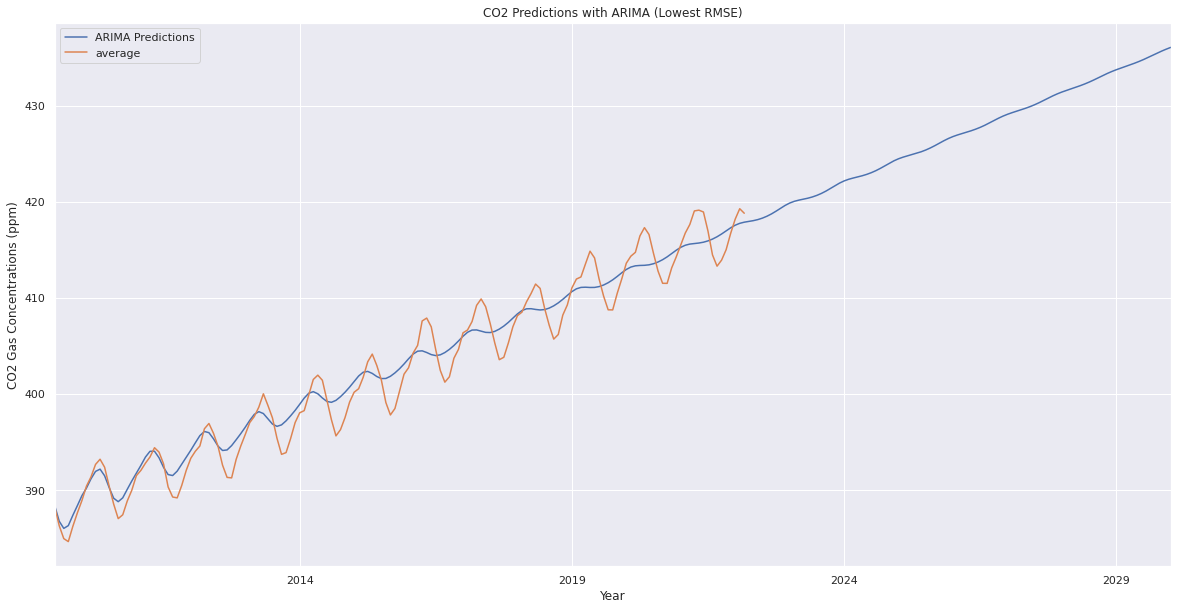

In [ ]:
# Best Parameters from Grid Search by RMSE
# p: 9
# d: 2
# q: 0

model = ARIMA(train['average'],order=(9,2,0))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="CO2 Predictions with ARIMA (Lowest RMSE)", xlabel="Year", ylabel="CO2 Gas Concentrations (ppm)")

Best Parameters from Grid Search by AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


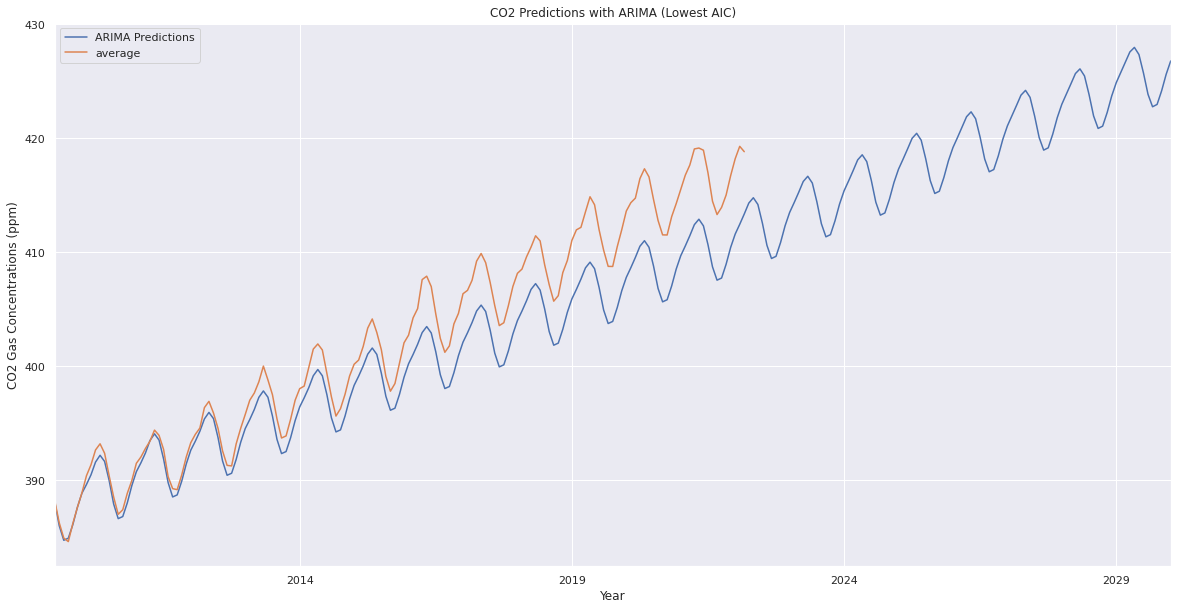

In [ ]:
# Best Parameters from Grid Search by AIC
# p: 10
# d: 2
# q: 12

model = ARIMA(train['average'],order=(10,2,12))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="CO2 Predictions with ARIMA (Lowest AIC)", xlabel="Year", ylabel="CO2 Gas Concentrations (ppm)")

## CH4 Prediction - ARIMA

In [ ]:
ch4Data_model = ch4Data.drop(columns=["decimal", "average_unc", "trend", "trend_unc"])
ch4Data_model["period"] = ch4Data_model["month"].astype(str) + "/" + ch4Data_model["year"].astype(str)
ch4Data_model.set_index("period", inplace=True)
ch4Data_model.index = pd.DatetimeIndex(ch4Data_model.index).to_period("M")
ch4Data_model.drop(columns=["year", "month"], inplace=True)
ch4Data_model.info()
ch4Data_model

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 462 entries, 1983-07 to 2021-12
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   average  462 non-null    float64
dtypes: float64(1)
memory usage: 7.2 KB


average
period          
1983-07   1625.9
1983-08   1628.1
1983-09   1638.4
1983-10   1644.8
1983-11   1642.6
...          ...
2021-08   1892.6
2021-09   1902.6
2021-10   1908.0
2021-11   1910.2
2021-12   1910.8

[462 rows x 1 columns]

In [ ]:
adf_test(ch4Data_model["average"])

1. ADF :  0.5728370793546829
2. P-Value :  0.9869266182424954
3. Num Of Lags :  16
4. Num Of Observations Used For ADF Regression: 445
5. Critical Values :
	 1% :  -3.4451307246616514
	 5% :  -2.86805689169311
	 10% :  -2.570241263729327


In [ ]:
# Grid Search for Hyperparameters (p,q)
RMSE_best_parameters = [None, None, None]
RMSE_best_rmse = None
RMSE_best_aic = None

AIC_best_parameters = [None, None, None]
AIC_best_aic = None
AIC_best_rmse = None

train=ch4Data_model.iloc[:-92]
test=ch4Data_model.iloc[-92:]

# for p in range(0,16):
#     for d in range (1,3):
#         for q in range (0,16):
#             model = ARIMA(train['average'],order=(p, d, q))
#             try:
#                 model = model.fit()
#             except:
#                 print("Model skipped")
#             else:
# #                 model.summary()
#         #         fig, ax = plt.subplots(figsize=(20,10))
#                 start = len(train)
#                 # end=pd.to_datetime("1/1/2025")
#                 end = len(train) + len(test) - 1
#                 pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions, p:' + str(p) + ' q: ' + str(q))
#         #         pred.plot(legend=True)
#         #         test['average'].plot(legend=True)
#                 print("Order:", p, d, q)
#     #             print(test['average'].mean())
#                 aic = model.aic
#                 print("AIC:", aic)
#                 rmse = np.sqrt(mean_squared_error(pred,test['average']))
#                 print("Test RMSE:", rmse)

#                 if RMSE_best_rmse is None or rmse < RMSE_best_rmse:
#                     RMSE_best_rmse = rmse
#                     RMSE_best_aic = aic
#                     RMSE_best_parameters[0] = p
#                     RMSE_best_parameters[1] = d
#                     RMSE_best_parameters[2] = q

#                 if AIC_best_aic is None or aic < AIC_best_aic:
#                     AIC_best_rmse = rmse
#                     AIC_best_aic = aic
#                     AIC_best_parameters[0] = p
#                     AIC_best_parameters[1] = d
#                     AIC_best_parameters[2] = q
                
            
# print("===========================")
# print("RMSE")
# print("Best RMSE:", RMSE_best_rmse)
# print("Best AIC:", RMSE_best_aic)
# print("Best Parameters", RMSE_best_parameters)
# print("===========================")
# print("===========================")
# print("AIC")
# print("Best AIC:", AIC_best_aic)
# print("Best RMSE:", AIC_best_rmse)
# print("Best Parameters", AIC_best_parameters)
# print("===========================")

Best Parameters from Grid Search by RMSE

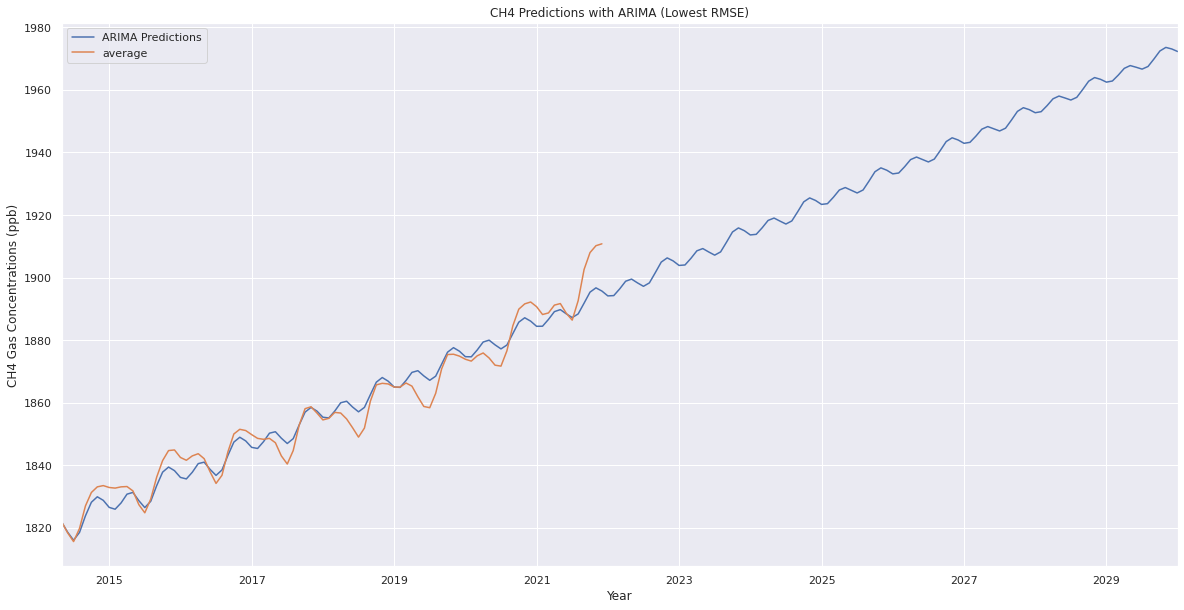

In [ ]:
# Best Parameters from Grid Search by RMSE
# p: 11
# d: 2
# q: 0

model = ARIMA(train['average'],order=(11,2,0))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="CH4 Predictions with ARIMA (Lowest RMSE)", xlabel="Year", ylabel="CH4 Gas Concentrations (ppb)")

Best Parameters from Grid Search by AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


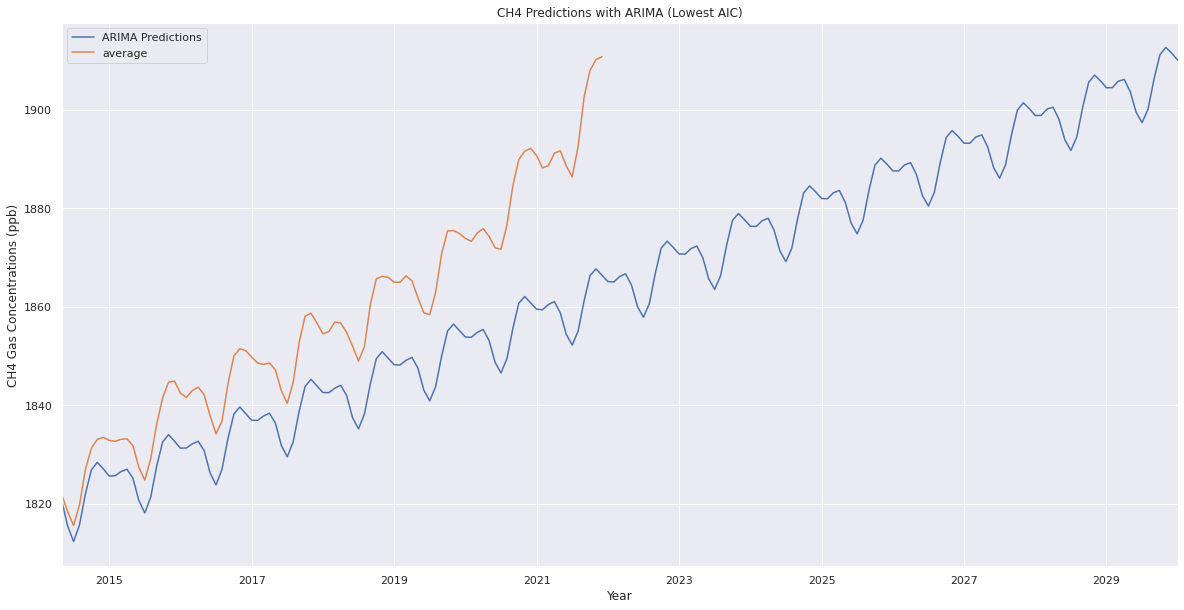

In [ ]:
# Best Parameters from Grid Search by AIC
# p: 9
# d: 2
# q: 14

model = ARIMA(train['average'],order=(9,2,14))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="CH4 Predictions with ARIMA (Lowest AIC)", xlabel="Year", ylabel="CH4 Gas Concentrations (ppb)")

N20 Prediction - ARIMA

In [ ]:
n2oData_model = n2oData.drop(columns=["decimal", "average_unc", "trend", "trend_unc"])
n2oData_model["period"] = n2oData_model["month"].astype(str) + "/" + n2oData_model["year"].astype(str)
n2oData_model.set_index("period", inplace=True)
n2oData_model.index = pd.DatetimeIndex(n2oData_model.index).to_period("M")
n2oData_model.drop(columns=["year", "month"], inplace=True)
n2oData_model.info()
n2oData_model

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 252 entries, 2001-01 to 2021-12
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   average  252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


average
period          
2001-01    316.3
2001-02    316.3
2001-03    316.2
2001-04    316.1
2001-05    316.1
...          ...
2021-08    334.3
2021-09    334.4
2021-10    334.6
2021-11    334.9
2021-12    335.1

[252 rows x 1 columns]

In [ ]:
adf_test(n2oData_model["average"])

1. ADF :  2.7396881269073985
2. P-Value :  0.9990880799653218
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 238
5. Critical Values :
	 1% :  -3.458128284586202
	 5% :  -2.873761835239286
	 10% :  -2.5732834559706235


In [ ]:
# Grid Search for Hyperparameters (p,q)
RMSE_best_parameters = [None, None, None]
RMSE_best_rmse = None
RMSE_best_aic = None

AIC_best_parameters = [None, None, None]
AIC_best_aic = None
AIC_best_rmse = None

train=n2oData_model.iloc[:-92]
test=n2oData_model.iloc[-92:]

# for p in range(0,16):
#     for d in range (1,3):
#         for q in range (0,16):
#             model = ARIMA(train['average'],order=(p, d, q))
#             try:
#                 model = model.fit()
#             except:
#                 print("Model skipped")
#             else:
# #                 model.summary()
#         #         fig, ax = plt.subplots(figsize=(20,10))
#                 start = len(train)
#                 # end=pd.to_datetime("1/1/2025")
#                 end = len(train) + len(test) - 1
#                 pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions, p:' + str(p) + ' q: ' + str(q))
#         #         pred.plot(legend=True)
#         #         test['average'].plot(legend=True)
#                 print("Order:", p, d, q)
#     #             print(test['average'].mean())
#                 aic = model.aic
#                 print("AIC:", aic)
#                 rmse = np.sqrt(mean_squared_error(pred,test['average']))
#                 print("Test RMSE:", rmse)

#                 if RMSE_best_rmse is None or rmse < RMSE_best_rmse:
#                     RMSE_best_rmse = rmse
#                     RMSE_best_aic = aic
#                     RMSE_best_parameters[0] = p
#                     RMSE_best_parameters[1] = d
#                     RMSE_best_parameters[2] = q

#                 if AIC_best_aic is None or aic < AIC_best_aic:
#                     AIC_best_rmse = rmse
#                     AIC_best_aic = aic
#                     AIC_best_parameters[0] = p
#                     AIC_best_parameters[1] = d
#                     AIC_best_parameters[2] = q
                
            
# print("===========================")
# print("RMSE")
# print("Best RMSE:", RMSE_best_rmse)
# print("Best AIC:", RMSE_best_aic)
# print("Best Parameters", RMSE_best_parameters)
# print("===========================")
# print("===========================")
# print("AIC")
# print("Best AIC:", AIC_best_aic)
# print("Best RMSE:", AIC_best_rmse)
# print("Best Parameters", AIC_best_parameters)
# print("===========================")

Best Parameters from Grid Search by RMSE

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


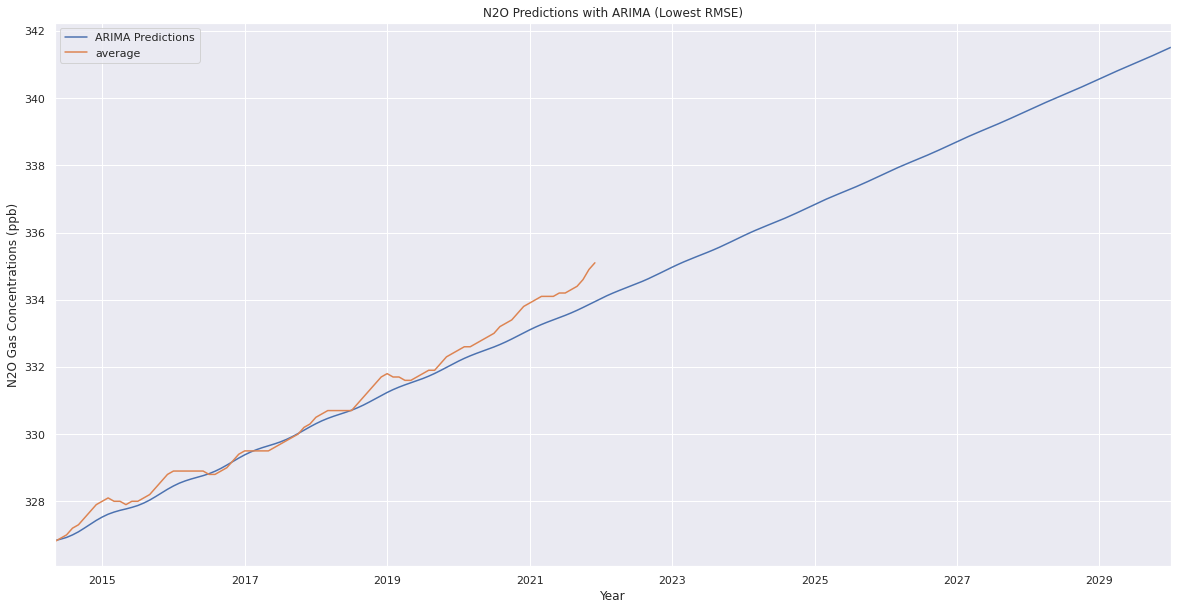

In [ ]:
# Best Parameters from Grid Search by RMSE
# p: 4
# d: 2
# q: 4

model = ARIMA(train['average'],order=(4,2,4))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="N2O Predictions with ARIMA (Lowest RMSE)", xlabel="Year", ylabel="N2O Gas Concentrations (ppb)")

Best Parameters from Grid Search by AIC

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


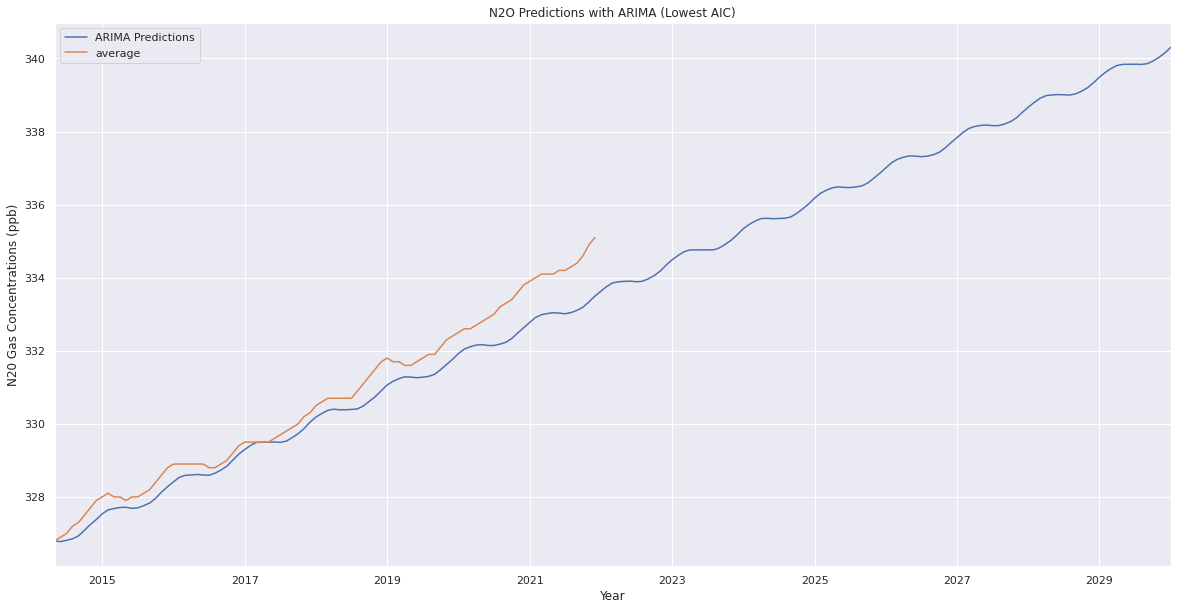

In [ ]:
# Best Parameters from Grid Search by AIC
# p: 6
# d: 1
# q: 8

model = ARIMA(train['average'],order=(6,1,8))
model = model.fit()
model.summary()

fig, ax = plt.subplots(figsize=(20,10))
start = len(train)
end=pd.to_datetime("1/1/2030")
# end = len(train) + len(test) - 1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True)
test['average'].plot(legend=True, title="N2O Predictions with ARIMA (Lowest AIC)", xlabel="Year", ylabel="N20 Gas Concentrations (ppb)")

## SARIMAX

In [ ]:
!pip install statsmodels==0.12.1

In [ ]:
# Import required modules for Machine Learning Tools

from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

from tqdm import tqdm_notebook
from itertools import product
import warnings
warnings.filterwarnings('ignore')

## CO2 Prediction

In [ ]:
url1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/co2_mm_mlo.csv'
co2Data = pd.read_csv(url1)
co2Data['Date'] = pd.to_datetime(co2Data[['year', 'month']].assign(Day=15))
co2Data = co2Data.set_index('Date').to_period('M')
co2Data.index = co2Data.index.to_timestamp()
co2Data.head()

year  month  decimal date  average  interpolated  trend  ndays  \
Date                                                                         
1958-03-01  1958      3     1958.2027   315.70        314.43     -1  -9.99   
1958-04-01  1958      4     1958.2877   317.45        315.16     -1  -9.99   
1958-05-01  1958      5     1958.3699   317.51        314.71     -1  -9.99   
1958-06-01  1958      6     1958.4548   317.24        315.14     -1  -9.99   
1958-07-01  1958      7     1958.5370   315.86        315.18     -1  -9.99   

            Unnamed: 7  
Date                    
1958-03-01       -0.99  
1958-04-01       -0.99  
1958-05-01       -0.99  
1958-06-01       -0.99  
1958-07-01       -0.99

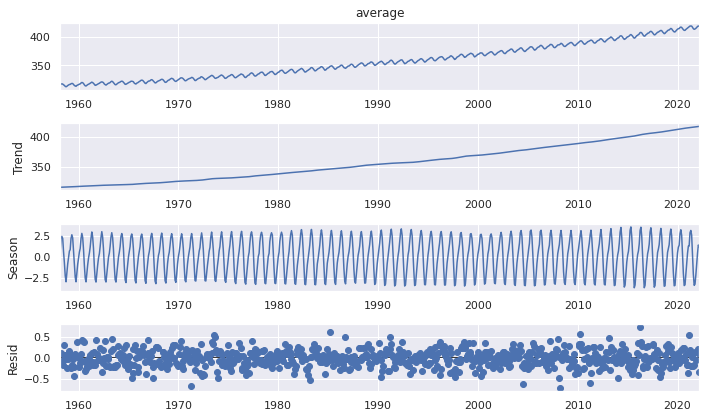

In [ ]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(co2Data['average'], seasonal=7)
res = stl.fit()
fig = res.plot()

Since the time series is not stationary, we can further perform a Dickey-Fuller Test to test its stationarity. The focus would be on the p-value, where a p-value <0.05 indicates that the time series is stationary.
To make a time series stationary, we can perfom a differencing operation on the required data. We will apply 1st-order differencing in this case and check the plot and p-value.

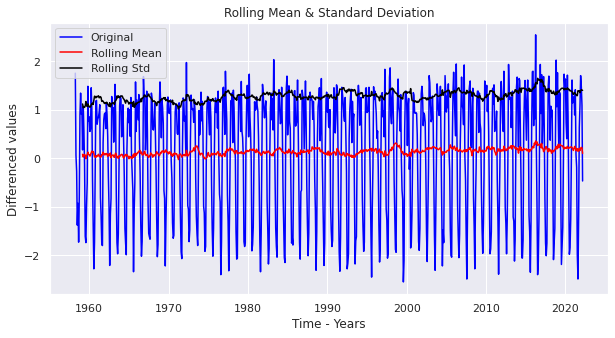

Results of Dickey-Fuller Test:
Test Statistic                  -5.245204
p-value                          0.000007
#Lags Used                      20.000000
Number of Observations Used    747.000000
Critical Value (1%)             -3.439134
Critical Value (5%)             -2.865417
Critical Value (10%)            -2.568834
dtype: float64
The time series is stationary at 95% level of confidence


In [ ]:
def test_stationarity(timeseries, rolling=12):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(rolling).mean()
    rolstd = timeseries.rolling(rolling).std()

    #Plot rolling statistics:
    plt.figure(figsize=(10, 5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Power consumption Old data')
    plt.xlabel('Time - Years')
    plt.ylabel('Differenced values')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:') 
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dfoutput['p-value'] < 0.05:
        print('The time series is stationary at 95% level of confidence')
    else:
        print('The time series is not stationary at 95% level of confidence')
        
        
co2_diff = co2Data['average'] - co2Data['average'].shift(1) # perform differencing operation
co2_diff = co2_diff.dropna()
test_stationarity(co2_diff, rolling=12)

After performing 1st Order Differencing, we can see that the p-value is less than 0.05, so we can safely say that the time series is stationary. From this, we can obtain our **d** value for the ARIMA parameters. Since we did 1st Order Differencing, the **d** value constitutes to 1, which is the **Integration (I)** component of the ARIMA model 

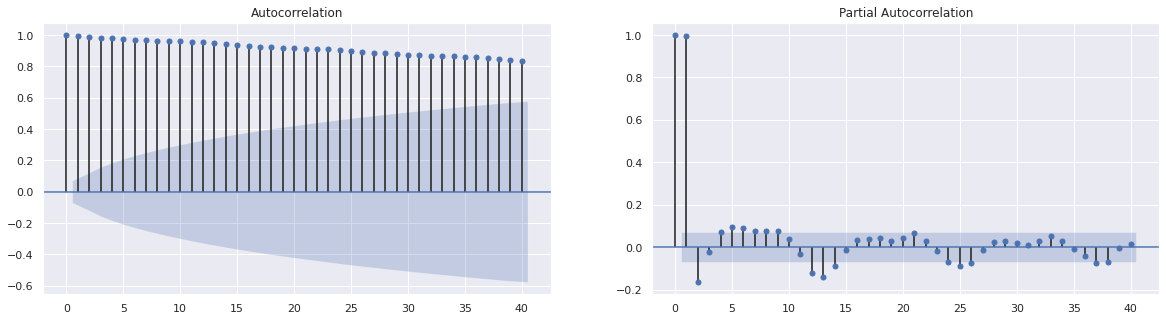

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

fig = sm.graphics.tsa.plot_acf(co2Data['average'], lags=40, ax=axes[0])

fig = sm.graphics.tsa.plot_pacf(co2Data['average'], lags=40, ax=axes[1])

In [ ]:
# Grid-search function for finding the p, q and seasonal parameters P, Q for the SARIMA model

def optimize_SARIMA(parameters_list, d, D, s, exog):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        exog - the exogenous variable
    """
    
    results = []
    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(exog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)','AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [ ]:
p = range(0,4,1)
d = 1
q = range(0,4,1)

P = range(0,4,1)
D = 1
Q = range(0,4,1)

s = 12

parameters = product(p, q, P, Q)
parameters_list = list(parameters)
print(len(parameters_list))

256


In [ ]:
# result = optimize_SARIMA(parameters_list, 1, 1, 12, co2Data['average'])
# result

In [ ]:
# Function for splitting the train and test

def train_test_split(timeseries, lags_for_prediction):
    split=len(timeseries)-lags_for_prediction
    train=timeseries[:split]
    test=timeseries[split:]
    return train, test

train_co2, test_co2 = train_test_split(co2Data, 63)

In [ ]:
train_co2.head()

year  month  decimal date  average  interpolated  trend  ndays  \
Date                                                                         
1958-03-01  1958      3     1958.2027   315.70        314.43     -1  -9.99   
1958-04-01  1958      4     1958.2877   317.45        315.16     -1  -9.99   
1958-05-01  1958      5     1958.3699   317.51        314.71     -1  -9.99   
1958-06-01  1958      6     1958.4548   317.24        315.14     -1  -9.99   
1958-07-01  1958      7     1958.5370   315.86        315.18     -1  -9.99   

            Unnamed: 7  
Date                    
1958-03-01       -0.99  
1958-04-01       -0.99  
1958-05-01       -0.99  
1958-06-01       -0.99  
1958-07-01       -0.99

In [ ]:
# test set starts from the year 2017
test_co2.head()

year  month  decimal date  average  interpolated  trend  ndays  \
Date                                                                         
2017-01-01  2017      1     2017.0417   406.36        406.05     27   0.68   
2017-02-01  2017      2     2017.1250   406.66        405.82     26   0.71   
2017-03-01  2017      3     2017.2083   407.54        406.06     24   1.03   
2017-04-01  2017      4     2017.2917   409.22        406.38     26   0.86   
2017-05-01  2017      5     2017.3750   409.89        406.38     27   0.57   

            Unnamed: 7  
Date                    
2017-01-01        0.25  
2017-02-01        0.27  
2017-03-01        0.40  
2017-04-01        0.32  
2017-05-01        0.21

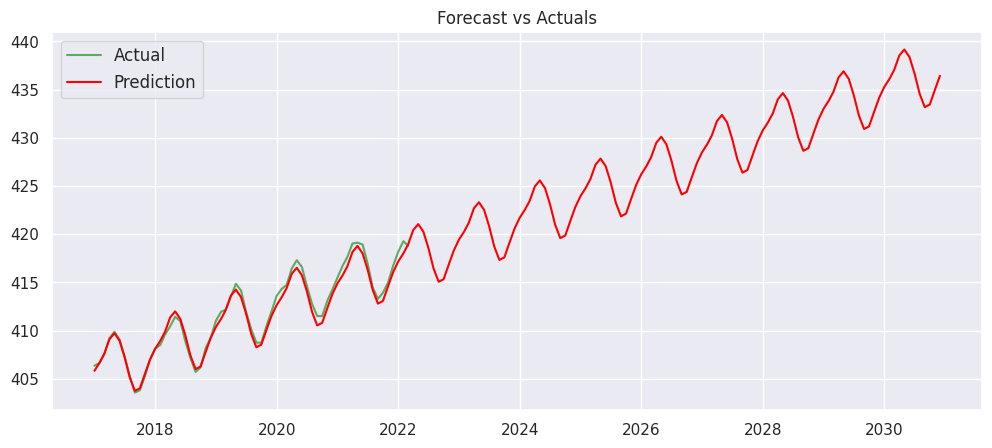

                                     SARIMAX Results                                      
Dep. Variable:                            average   No. Observations:                  706
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -178.516
Date:                            Thu, 21 Apr 2022   AIC                            365.032
Time:                                    14:55:29   BIC                            383.196
Sample:                                03-01-1958   HQIC                           372.057
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2220      0.089      2.504      0.012       0.048       0.396
ma.L1         -0.5657      0.076   

In [ ]:
def forecasting (p,d,q,P,D,Q,season, lags_for_forecast, train, test):
  
  model = SARIMAX(train, order=(p,d,q), seasonal_order=(P,D,Q,season), simple_differencing=0, enforce_stationarity=True, enforce_invertibility=False)
  
  #if True time series provided as endog is literally differenced and an ARMA model is fit to the resulting new time series
  
  fitted = model.fit(disp=-1)  
    
  start = '2017-01-01'
  end = '2030-12-01'
    
  #start = len(train)
  #end = len(train) + len(test)-1

  # Forecast
  forecast = fitted.predict(start=start,end=end,typ='levels')

  # Plot
  plt.figure(figsize=(12,5), dpi=100)
  #plt.plot(train, color='blue', label='train')
  plt.plot(test, color='green', label='Actual', alpha=0.6)
  plt.plot(forecast, color='red', label = 'Prediction')
  plt.title('Forecast vs Actuals')
  plt.legend(loc='upper left', fontsize=12)
  plt.show()
    
  from sklearn import metrics
  from math import sqrt

  #print('\033[1m' + 'MAE: ' + '\033[0m', metrics.mean_absolute_error(test, forecast))
  #print('\033[1m' + 'MSE: ' + '\033[0m', metrics.mean_squared_error(test, forecast))
  #print('\033[1m' + 'RMSE:' + '\033[0m', np.sqrt(metrics.mean_squared_error(test, forecast)))
  #print('\033[1m' + 'MEAN:' + '\033[0m', test.mean())
    
  #RSS=np.sqrt(sum(forecast.values-test['average'].values.reshape(-1))**2)/lags_for_forecast

  print(fitted.summary())
    
  return forecast
    
forecast_co2 = forecasting (1,1,1, 0,1,1, 12, 63, train_co2['average'], test_co2['average'])

In [ ]:
forecast_co2

2017-01-01    405.837478
2017-02-01    406.686639
2017-03-01    407.609892
2017-04-01    409.108416
2017-05-01    409.736708
                 ...    
2030-08-01    434.586331
2030-09-01    433.185777
2030-10-01    433.459761
2030-11-01    434.995258
2030-12-01    436.436180
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

---
## CH4 Prediction

In [ ]:
url2 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/ch4_mm_gl.csv'
ch4Data = pd.read_csv(url2)
ch4Data['Date'] = pd.to_datetime(ch4Data[['year', 'month']].assign(Day=15))
ch4Data = ch4Data.set_index('Date').to_period('M')
ch4Data.index = ch4Data.index.to_timestamp()
ch4Data.head()

year  month   decimal  average  average_unc   trend  trend_unc
Date                                                                      
1983-07-01  1983      7  1983.542   1625.9          2.3  1635.1        1.5
1983-08-01  1983      8  1983.625   1628.1          2.9  1635.6        1.4
1983-09-01  1983      9  1983.708   1638.4          2.3  1636.1        1.3
1983-10-01  1983     10  1983.792   1644.8          1.4  1636.7        1.2
1983-11-01  1983     11  1983.875   1642.6          0.8  1637.4        1.2

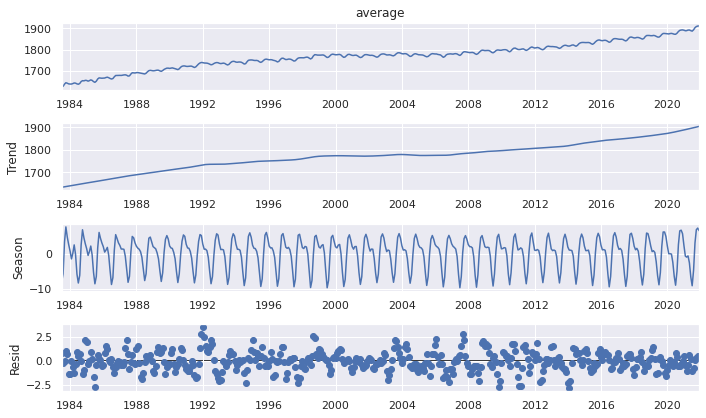

In [ ]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(ch4Data['average'], seasonal=7)
res = stl.fit()
fig = res.plot()

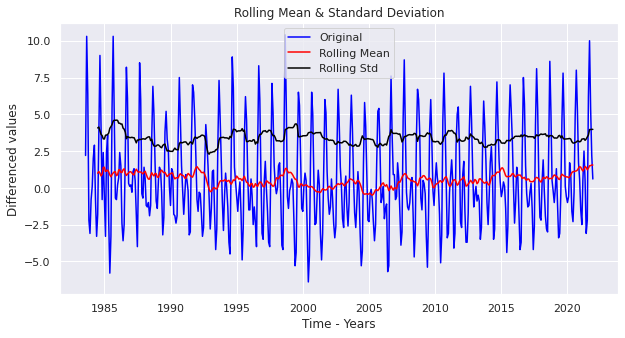

Results of Dickey-Fuller Test:
Test Statistic                  -3.089793
p-value                          0.027318
#Lags Used                      12.000000
Number of Observations Used    448.000000
Critical Value (1%)             -3.445031
Critical Value (5%)             -2.868013
Critical Value (10%)            -2.570218
dtype: float64
The time series is stationary at 95% level of confidence


In [ ]:
ch4_diff = ch4Data['average'] - ch4Data['average'].shift(1) # perform differencing operation
ch4_diff = ch4_diff.dropna()
test_stationarity(ch4_diff, rolling=12)

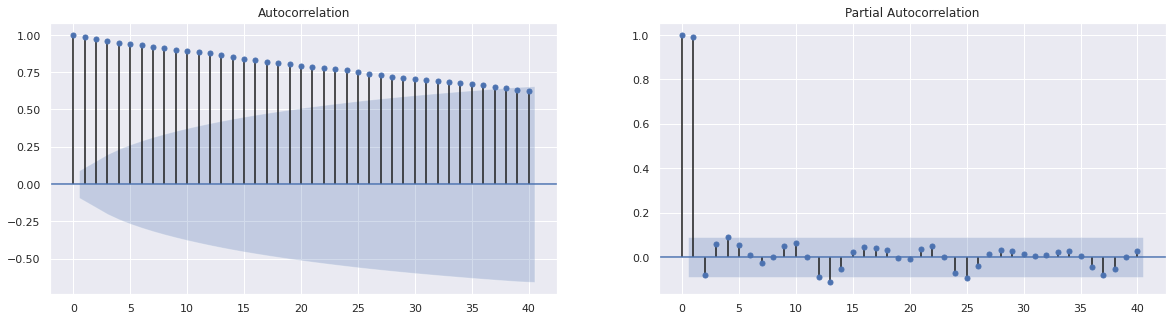

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

fig = sm.graphics.tsa.plot_acf(ch4Data['average'], lags=40, ax=axes[0])

fig = sm.graphics.tsa.plot_pacf(ch4Data['average'], lags=40, ax=axes[1])

In [ ]:
# result = optimize_SARIMA(parameters_list, 1, 1, 12, ch4Data['average'])
# result

In [ ]:
train_ch4, test_ch4 = train_test_split(ch4Data, 60)

In [ ]:
train_ch4.head()

year  month   decimal  average  average_unc   trend  trend_unc
Date                                                                      
1983-07-01  1983      7  1983.542   1625.9          2.3  1635.1        1.5
1983-08-01  1983      8  1983.625   1628.1          2.9  1635.6        1.4
1983-09-01  1983      9  1983.708   1638.4          2.3  1636.1        1.3
1983-10-01  1983     10  1983.792   1644.8          1.4  1636.7        1.2
1983-11-01  1983     11  1983.875   1642.6          0.8  1637.4        1.2

In [ ]:
test_ch4.head()

year  month   decimal  average  average_unc   trend  trend_unc
Date                                                                      
2017-01-01  2017      1  2017.042   1849.8          0.9  1846.6        0.6
2017-02-01  2017      2  2017.125   1848.6          1.3  1847.1        0.6
2017-03-01  2017      3  2017.208   1848.3          1.4  1847.6        0.6
2017-04-01  2017      4  2017.292   1848.6          1.2  1848.1        0.6
2017-05-01  2017      5  2017.375   1847.2          0.9  1848.6        0.6

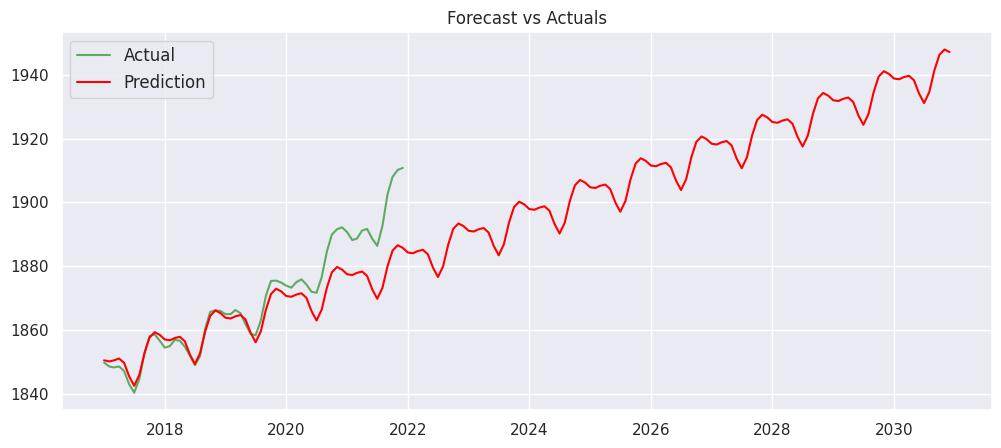

                                      SARIMAX Results                                       
Dep. Variable:                              average   No. Observations:                  402
Model:             SARIMAX(3, 1, 3)x(0, 1, [1], 12)   Log Likelihood                -442.598
Date:                              Thu, 21 Apr 2022   AIC                            901.197
Time:                                      14:55:46   BIC                            932.906
Sample:                                  07-01-1983   HQIC                           913.768
                                       - 12-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0262      2.579     -0.010      0.992      -5.082       5.029
ar.L2         -0.25

In [ ]:
forecast_ch4 = forecasting (3,1,3, 0,1,1, 12, 60, train_ch4['average'], test_ch4['average'])

In [ ]:
forecast_ch4

2017-01-01    1850.526057
2017-02-01    1850.176076
2017-03-01    1850.512791
2017-04-01    1851.091165
2017-05-01    1849.758311
                 ...     
2030-08-01    1934.552934
2030-09-01    1941.400281
2030-10-01    1946.237509
2030-11-01    1947.926467
2030-12-01    1947.109694
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

---
## N2O Prediction

In [ ]:
url3 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/n2o_mm_gl.csv'
n2oData = pd.read_csv(url3)
n2oData['Date'] = pd.to_datetime(n2oData[['year', 'month']].assign(Day=15))
n2oData = n2oData.set_index('Date').to_period('M')
n2oData.index = n2oData.index.to_timestamp()
n2oData.head()

year  month   decimal  average  average_unc  trend  trend_unc
Date                                                                     
2001-01-01  2001      1  2001.042    316.3          0.2  316.0        0.1
2001-02-01  2001      2  2001.125    316.3          0.2  316.1        0.1
2001-03-01  2001      3  2001.208    316.2          0.2  316.2        0.1
2001-04-01  2001      4  2001.292    316.1          0.1  316.2        0.1
2001-05-01  2001      5  2001.375    316.1          0.1  316.3        0.1

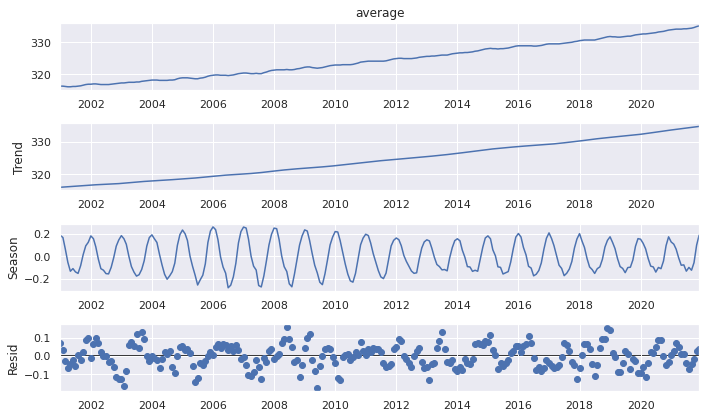

In [ ]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(n2oData['average'], seasonal=7)
res = stl.fit()
fig = res.plot()

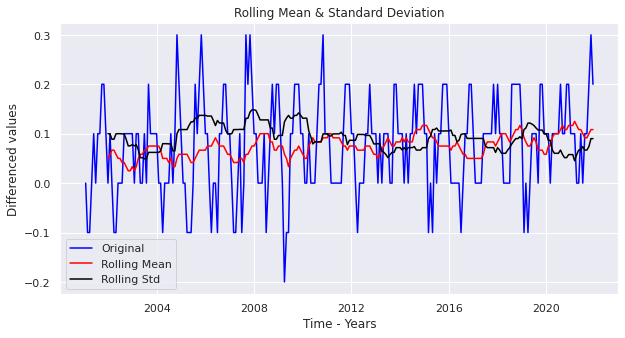

Results of Dickey-Fuller Test:
Test Statistic                  -3.017139
p-value                          0.033325
#Lags Used                      12.000000
Number of Observations Used    238.000000
Critical Value (1%)             -3.458128
Critical Value (5%)             -2.873762
Critical Value (10%)            -2.573283
dtype: float64
The time series is stationary at 95% level of confidence


In [ ]:
n2o_diff = n2oData['average'] - n2oData['average'].shift(1)
n2o_diff = n2o_diff.dropna()
test_stationarity(n2o_diff, rolling=12)

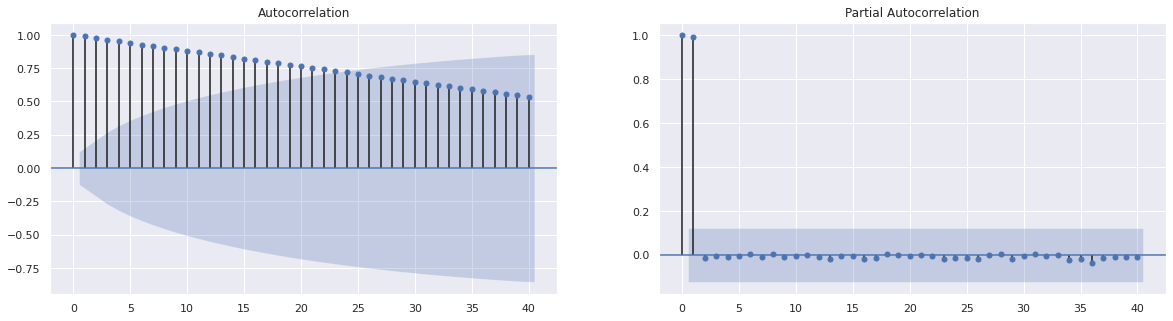

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20,5))

fig = sm.graphics.tsa.plot_acf(n2oData['average'], lags=40, ax=axes[0])

fig = sm.graphics.tsa.plot_pacf(n2oData['average'], lags=40, ax=axes[1])

In [ ]:
# result = optimize_SARIMA(parameters_list, 1, 1, 12, n2oData['average'])
# result

In [ ]:
train_n2o, test_n2o = train_test_split(n2oData, 60)

In [ ]:
train_n2o.head()

year  month   decimal  average  average_unc  trend  trend_unc
Date                                                                     
2001-01-01  2001      1  2001.042    316.3          0.2  316.0        0.1
2001-02-01  2001      2  2001.125    316.3          0.2  316.1        0.1
2001-03-01  2001      3  2001.208    316.2          0.2  316.2        0.1
2001-04-01  2001      4  2001.292    316.1          0.1  316.2        0.1
2001-05-01  2001      5  2001.375    316.1          0.1  316.3        0.1

In [ ]:
test_n2o.head()

year  month   decimal  average  average_unc  trend  trend_unc
Date                                                                     
2017-01-01  2017      1  2017.042    329.5          0.2  329.3        0.1
2017-02-01  2017      2  2017.125    329.5          0.2  329.4        0.1
2017-03-01  2017      3  2017.208    329.5          0.2  329.4        0.1
2017-04-01  2017      4  2017.292    329.5          0.2  329.5        0.1
2017-05-01  2017      5  2017.375    329.5          0.2  329.6        0.1

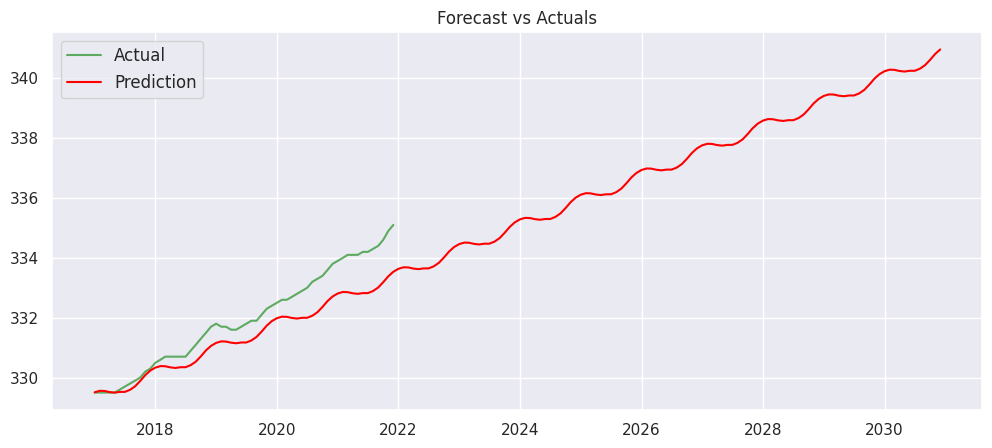

                                      SARIMAX Results                                       
Dep. Variable:                              average   No. Observations:                  192
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 224.485
Date:                              Thu, 21 Apr 2022   AIC                           -442.969
Time:                                      14:55:55   BIC                           -433.407
Sample:                                  01-01-2001   HQIC                          -439.092
                                       - 12-01-2016                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1708      0.078      2.200      0.028       0.019       0.323
ma.S.L12      -1.00

In [ ]:
forecast_n2o = forecasting (1,1,0, 0,1,1, 12, 60, train_n2o['average'], test_n2o['average'])

In [ ]:
forecast_n2o

2017-01-01    329.508554
2017-02-01    329.560106
2017-03-01    329.554121
2017-04-01    329.516666
2017-05-01    329.497924
                 ...    
2030-08-01    340.316679
2030-09-01    340.435429
2030-10-01    340.610426
2030-11-01    340.810411
2030-12-01    340.960319
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

## Temperature Prediction

In [ ]:
# link1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/climate-change-temperature.csv'
# tempData = pd.read_csv(link1)
# tempData = tempData[tempData.Entity == 'World']

# tempData = tempData.set_index('Day')
# tempData.index = tempData.index.astype(str)
# tempData.index = pd.DatetimeIndex(tempData.index).to_period("M")
# tempData.index = tempData.index.to_timestamp()
tempData

Entity      Code  temperature_anomaly
Day                                             
1880-01-01  World  OWID_WRL                -0.17
1880-02-01  World  OWID_WRL                -0.23
1880-03-01  World  OWID_WRL                -0.08
1880-04-01  World  OWID_WRL                -0.15
1880-05-01  World  OWID_WRL                -0.09
...           ...       ...                  ...
2021-09-01  World  OWID_WRL                 0.92
2021-10-01  World  OWID_WRL                 0.99
2021-11-01  World  OWID_WRL                 0.93
2021-12-01  World  OWID_WRL                 0.86
2022-01-01  World  OWID_WRL                 0.93

[1705 rows x 3 columns]

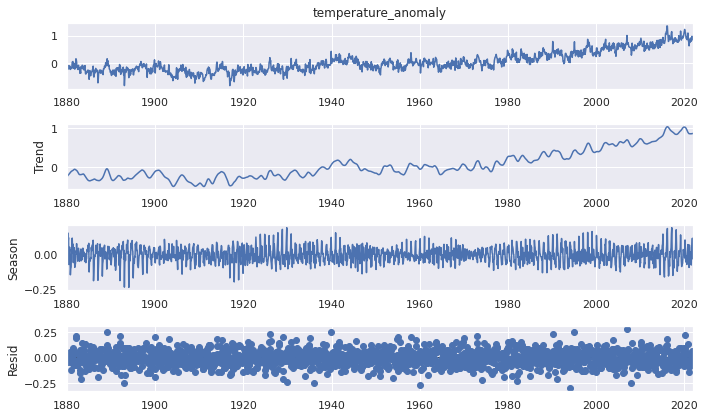

In [ ]:
plt.rc('figure',figsize=(10,6))
plt.rc('font',size=13)
stl = STL(tempData['temperature_anomaly'], seasonal=7)
res = stl.fit()
fig = res.plot()

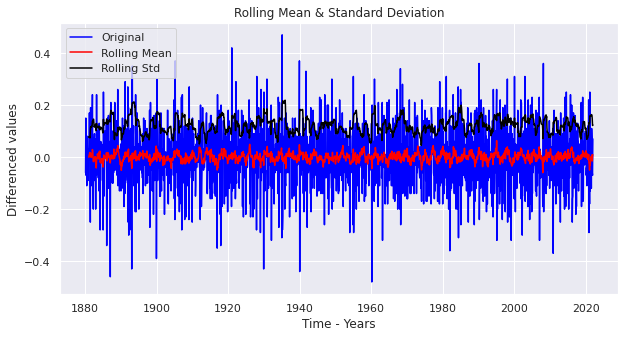

Results of Dickey-Fuller Test:
Test Statistic                -1.236645e+01
p-value                        5.400854e-23
#Lags Used                     2.300000e+01
Number of Observations Used    1.680000e+03
Critical Value (1%)           -3.434248e+00
Critical Value (5%)           -2.863262e+00
Critical Value (10%)          -2.567687e+00
dtype: float64
The time series is stationary at 95% level of confidence


In [ ]:
temp_diff = tempData['temperature_anomaly'] - tempData['temperature_anomaly'].shift(1)
temp_diff = temp_diff.dropna()
test_stationarity(temp_diff, rolling=12)

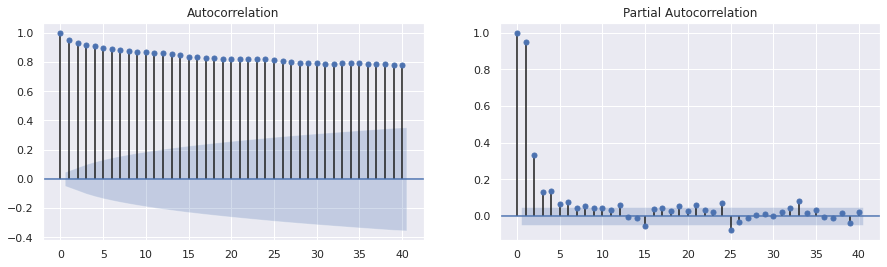

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(tempData['temperature_anomaly'], lags=40, ax=axes[0])

fig = sm.graphics.tsa.plot_pacf(tempData['temperature_anomaly'], lags=40, ax=axes[1])

In [ ]:
# result = optimize_SARIMA(parameters_list, 1, 1, 12, tempData['temperature_anomaly'])
# result

In [ ]:
train_temp, test_temp = train_test_split(tempData, 61)

In [ ]:
train_temp.head()

Entity      Code  temperature_anomaly
Day                                             
1880-01-01  World  OWID_WRL                -0.17
1880-02-01  World  OWID_WRL                -0.23
1880-03-01  World  OWID_WRL                -0.08
1880-04-01  World  OWID_WRL                -0.15
1880-05-01  World  OWID_WRL                -0.09

In [ ]:
test_temp.head()

Entity      Code  temperature_anomaly
Day                                             
2017-01-01  World  OWID_WRL                 1.02
2017-02-01  World  OWID_WRL                 1.14
2017-03-01  World  OWID_WRL                 1.16
2017-04-01  World  OWID_WRL                 0.94
2017-05-01  World  OWID_WRL                 0.91

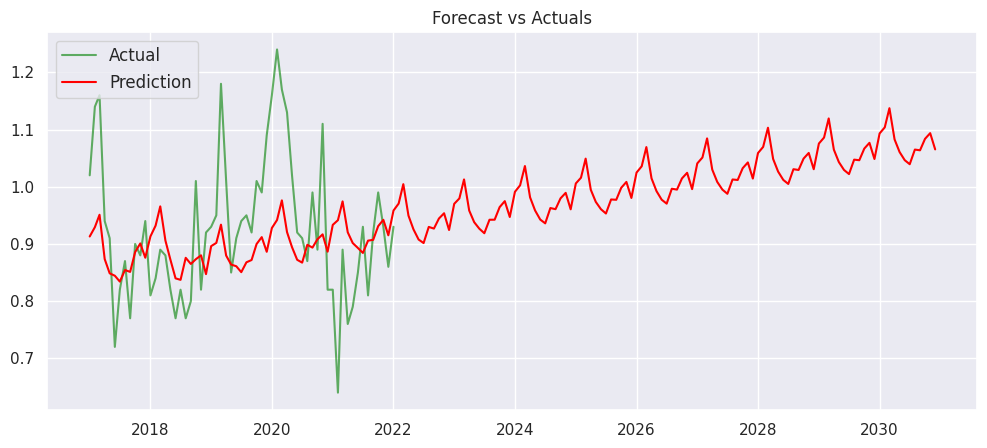

                                     SARIMAX Results                                      
Dep. Variable:                temperature_anomaly   No. Observations:                 1644
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 12)   Log Likelihood                1313.666
Date:                            Thu, 21 Apr 2022   AIC                          -2611.332
Time:                                    14:57:07   BIC                          -2568.156
Sample:                                01-01-1880   HQIC                         -2595.315
                                     - 12-01-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8655      0.022     38.544      0.000       0.822       0.910
ma.L1         -1.4093      0.031   

In [ ]:
forecast_temp = forecasting (1,1,2, 2,1,2, 12, 61, train_temp['temperature_anomaly'], test_temp['temperature_anomaly'])

In [ ]:
forecast_temp

2017-01-01    0.913034
2017-02-01    0.929295
2017-03-01    0.951006
2017-04-01    0.873542
2017-05-01    0.848610
                ...   
2030-08-01    1.064957
2030-09-01    1.063727
2030-10-01    1.083748
2030-11-01    1.093689
2030-12-01    1.065292
Freq: MS, Name: predicted_mean, Length: 168, dtype: float64

# Multi Variate Linear Regression for Disasters

In [ ]:
# co2Data_model.iloc[(co2Data_model.index >= "2001") & (co2Data_model.index < "2022")]

avg_co2 = {}
for year in range (2001, 2021):
  avg_co2[year] = co2Data_model.iloc[(co2Data_model.index >= str(year)) & (co2Data_model.index < str(year+1))].mean()

co2Data_LF = pd.DataFrame.from_dict(avg_co2, orient="index").rename(columns={"average" : "CO2 Average"})
co2Data_LF

CO2 Average
2001   371.319167
2002   373.452500
2003   375.983333
2004   377.698333
2005   379.983333
2006   382.090833
2007   384.025000
2008   385.830833
2009   387.643333
2010   390.101667
2011   391.850833
2012   394.055833
2013   396.737500
2014   398.870833
2015   401.012500
2016   404.412500
2017   406.758333
2018   408.715000
2019   411.654167
2020   414.238333

In [ ]:
# ch4Data_model.iloc[(ch4Data_model.index >= "2001") & (ch4Data_model.index < "2022")]

avg_ch4 = {}
for year in range (2001, 2021):
  avg_ch4[year] = ch4Data_model.iloc[(ch4Data_model.index >= str(year)) & (ch4Data_model.index < str(year+1))].mean()

ch4Data_LF = pd.DataFrame.from_dict(avg_ch4, orient="index").rename(columns={"average" : "CH4 Average"})
ch4Data_LF

CH4 Average
2001  1771.275000
2002  1772.741667
2003  1777.400000
2004  1777.008333
2005  1774.191667
2006  1775.033333
2007  1781.525000
2008  1787.091667
2009  1793.600000
2010  1799.008333
2011  1803.166667
2012  1808.116667
2013  1813.450000
2014  1822.741667
2015  1834.366667
2016  1843.225000
2017  1849.741667
2018  1857.433333
2019  1866.691667
2020  1879.250000

In [ ]:
# n2oData_model.iloc[(n2oData_model.index >= "2001") & (n2oData_model.index < "2022")]

avg_n2o = {}
for year in range (2001, 2021):
  avg_n2o[year] = n2oData_model.iloc[(n2oData_model.index >= str(year)) & (n2oData_model.index < str(year+1))].mean()

n2oData_LF = pd.DataFrame.from_dict(avg_n2o, orient="index").rename(columns={"average" : "N2O Average"})
n2oData_LF

N2O Average
2001   316.366667
2002   316.933333
2003   317.625000
2004   318.258333
2005   318.933333
2006   319.833333
2007   320.466667
2008   321.516667
2009   322.266667
2010   323.191667
2011   324.225000
2012   325.066667
2013   325.950000
2014   327.091667
2015   328.175000
2016   328.958333
2017   329.750000
2018   330.925000
2019   331.875000
2020   333.033333

In [ ]:
# tempData.iloc[(tempData.index >= "2001") & (tempData.index < "2022")].drop(columns=['Entity', 'Code'])

avg_temp = {}
for year in range (2001, 2021):
  avg_temp[year] = tempData.iloc[(tempData.index >= str(year)) & (tempData.index < str(year+1))].mean()

tempData_LF = pd.DataFrame.from_dict(avg_temp, orient="index")
tempData_LF

temperature_anomaly
2001             0.535000
2002             0.627500
2003             0.615833
2004             0.533333
2005             0.675833
2006             0.635000
2007             0.661667
2008             0.540000
2009             0.653333
2010             0.718333
2011             0.604167
2012             0.645000
2013             0.674167
2014             0.744167
2015             0.895833
2016             1.015833
2017             0.922500
2018             0.845833
2019             0.977500
2020             1.019167

In [ ]:
total_LF = pd.concat([co2Data_LF, ch4Data_LF, n2oData_LF, tempData_LF, disasterCountPerYear[disasterCountPerYear.index >= 2001]], axis=1)
total_LF

CO2 Average  CH4 Average  N2O Average  temperature_anomaly  \
2001   371.319167  1771.275000   316.366667             0.535000   
2002   373.452500  1772.741667   316.933333             0.627500   
2003   375.983333  1777.400000   317.625000             0.615833   
2004   377.698333  1777.008333   318.258333             0.533333   
2005   379.983333  1774.191667   318.933333             0.675833   
2006   382.090833  1775.033333   319.833333             0.635000   
2007   384.025000  1781.525000   320.466667             0.661667   
2008   385.830833  1787.091667   321.516667             0.540000   
2009   387.643333  1793.600000   322.266667             0.653333   
2010   390.101667  1799.008333   323.191667             0.718333   
2011   391.850833  1803.166667   324.225000             0.604167   
2012   394.055833  1808.116667   325.066667             0.645000   
2013   396.737500  1813.450000   325.950000             0.674167   
2014   398.870833  1822.741667   327.091667             0.744167   
2015   401.012500  1834.366667   328.175000             0.895833   
2016   404.412500  1843.225000   328.958333             1.015833   
2017   406.758333  1849.741667   329.750000             0.922500   
2018   408.715000  1857.433333   330.925000             0.845833   
2019   411.654167  1866.691667   331.875000             0.977500   
2020   414.238333  1879.250000   333.033333             1.019167   

      No. Of Disasters  
2001               447  
2002               532  
2003               392  
2004               405  
2005               498  
2006               446  
2007               449  
2008               400  
2009               384  
2010               441  
2011               357  
2012               370  
2013               352  
2014               347  
2015               398  
2016               350  
2017               371  
2018               338  
2019               442  
2020               398

Intercept of Regression 	: b =  [10437.5069256]
Coefficients of Regression 	: a =  [[ 13.74116029   2.09891053 -59.77098995 222.65284653]]

            Predictors  Coefficients
0          CO2 Average     13.741160
1          CH4 Average      2.098911
2          N2O Average    -59.770990
3  temperature_anomaly    222.652847



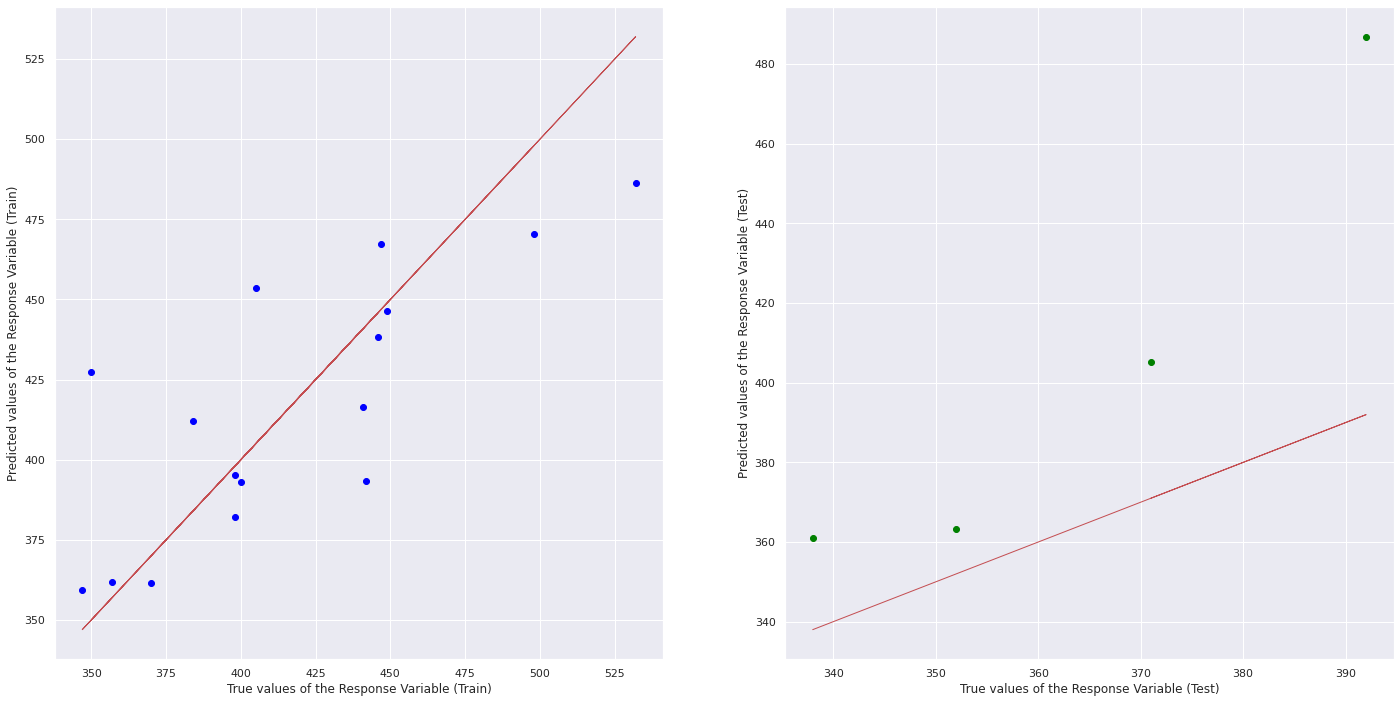

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.6118267149600654
Mean Squared Error (MSE) 		: 999.3036006746815
Root Mean Squared Error (RMSE) 	: 31.61176364385071

Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: -5.559433554388047
Mean Squared Error (MSE) 		: 2706.996234976517
Root Mean Squared Error (RMSE) 	: 52.028801975218656



In [ ]:
from sklearn.model_selection import train_test_split
predictors = ["CO2 Average", "CH4 Average", "N2O Average", "temperature_anomaly"]

y = pd.DataFrame(total_LF["No. Of Disasters"])
x = pd.DataFrame(total_LF[predictors])

# split in to train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression() # create the linear regression object
linreg.fit(x_train, y_train) # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t\tTrain Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \t\tTest Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

In [ ]:
co2Data_pred = forecast_co2.to_frame().iloc[forecast_co2.index >= "2021"]

avg_co2_pred = {}
for year in range (2021, 2031):
  avg_co2_pred[year] = co2Data_pred.iloc[(co2Data_pred.index >= str(year)) & (co2Data_pred.index < str(year+1))].mean()

co2Data_PredAvg = pd.DataFrame.from_dict(avg_co2_pred, orient="index").rename(columns={"predicted_mean" : "CO2 Average"})
co2Data_PredAvg

CO2 Average
2021   415.783164
2022   418.047540
2023   420.311916
2024   422.576292
2025   424.840668
2026   427.105044
2027   429.369421
2028   431.633797
2029   433.898173
2030   436.162549

In [ ]:
# forecast_ch4

ch4Data_pred = forecast_ch4.to_frame().iloc[forecast_ch4.index >= "2021"]

avg_ch4_pred = {}
for year in range (2021, 2031):
  avg_ch4_pred[year] = ch4Data_pred.iloc[(ch4Data_pred.index >= str(year)) & (ch4Data_pred.index < str(year+1))].mean()

ch4Data_PredAvg = pd.DataFrame.from_dict(avg_ch4_pred, orient="index").rename(columns={"predicted_mean" : "CH4 Average"})
ch4Data_PredAvg

CH4 Average
2021  1878.427730
2022  1885.242155
2023  1892.056580
2024  1898.871005
2025  1905.685430
2026  1912.499855
2027  1919.314280
2028  1926.128705
2029  1932.943130
2030  1939.757555

In [ ]:
# forecast_n2o

n2oData_pred = forecast_n2o.to_frame().iloc[forecast_n2o.index >= "2021"]

avg_n2o_pred = {}
for year in range (2021, 2031):
  avg_n2o_pred[year] = n2oData_pred.iloc[(n2oData_pred.index >= str(year)) & (n2oData_pred.index < str(year+1))].mean()

n2oData_PredAvg = pd.DataFrame.from_dict(avg_n2o_pred, orient="index").rename(columns={"predicted_mean" : "N2O Average"})
n2oData_PredAvg

N2O Average
2021   332.982800
2022   333.807801
2023   334.632801
2024   335.457801
2025   336.282802
2026   337.107802
2027   337.932802
2028   338.757803
2029   339.582803
2030   340.407803

In [ ]:
forecast_temp

tempData_pred = forecast_temp.to_frame().iloc[forecast_temp.index >= "2021"]

avg_temp_pred = {}
for year in range (2021, 2031):
  avg_temp_pred[year] = tempData_pred.iloc[(tempData_pred.index >= str(year)) & (tempData_pred.index < str(year+1))].mean()

tempData_PredAvg = pd.DataFrame.from_dict(avg_temp_pred, orient="index").rename(columns={"predicted_mean" : "temperature_anomaly"})
tempData_PredAvg

temperature_anomaly
2021             0.920804
2022             0.941394
2023             0.956269
2024             0.975124
2025             0.991229
2026             1.009238
2027             1.025930
2028             1.043533
2029             1.060506
2030             1.077915

In [ ]:
total_pred = pd.concat([co2Data_PredAvg, ch4Data_PredAvg, n2oData_PredAvg, tempData_PredAvg], axis=1)
total_pred

CO2 Average  CH4 Average  N2O Average  temperature_anomaly
2021   415.783164  1878.427730   332.982800             0.920804
2022   418.047540  1885.242155   333.807801             0.941394
2023   420.311916  1892.056580   334.632801             0.956269
2024   422.576292  1898.871005   335.457801             0.975124
2025   424.840668  1905.685430   336.282802             0.991229
2026   427.105044  1912.499855   337.107802             1.009238
2027   429.369421  1919.314280   337.932802             1.025930
2028   431.633797  1926.128705   338.757803             1.043533
2029   433.898173  1932.943130   339.582803             1.060506
2030   436.162549  1939.757555   340.407803             1.077915

In [ ]:
x_pred = pd.DataFrame(total_pred[predictors])
y_pred = linreg.predict(x_pred)
y_pred

array([[395.80989185],
       [396.50114282],
       [395.92007991],
       [396.22514051],
       [395.91792997],
       [396.03464172],
       [395.85799518],
       [395.88438306],
       [395.77025493],
       [395.75337596]])

In [ ]:
total_pred = pd.concat([total_pred, pd.DataFrame(y_pred, columns = ["Predicted Amount of Natural Disasters"], index = total_pred.index)], axis=1)
total_pred

CO2 Average  CH4 Average  N2O Average  temperature_anomaly  \
2021   415.783164  1878.427730   332.982800             0.920804   
2022   418.047540  1885.242155   333.807801             0.941394   
2023   420.311916  1892.056580   334.632801             0.956269   
2024   422.576292  1898.871005   335.457801             0.975124   
2025   424.840668  1905.685430   336.282802             0.991229   
2026   427.105044  1912.499855   337.107802             1.009238   
2027   429.369421  1919.314280   337.932802             1.025930   
2028   431.633797  1926.128705   338.757803             1.043533   
2029   433.898173  1932.943130   339.582803             1.060506   
2030   436.162549  1939.757555   340.407803             1.077915   

      Predicted Amount of Natural Disasters  
2021                             395.809892  
2022                             396.501143  
2023                             395.920080  
2024                             396.225141  
2025                             395.917930  
2026                             396.034642  
2027                             395.857995  
2028                             395.884383  
2029                             395.770255  
2030                             395.753376

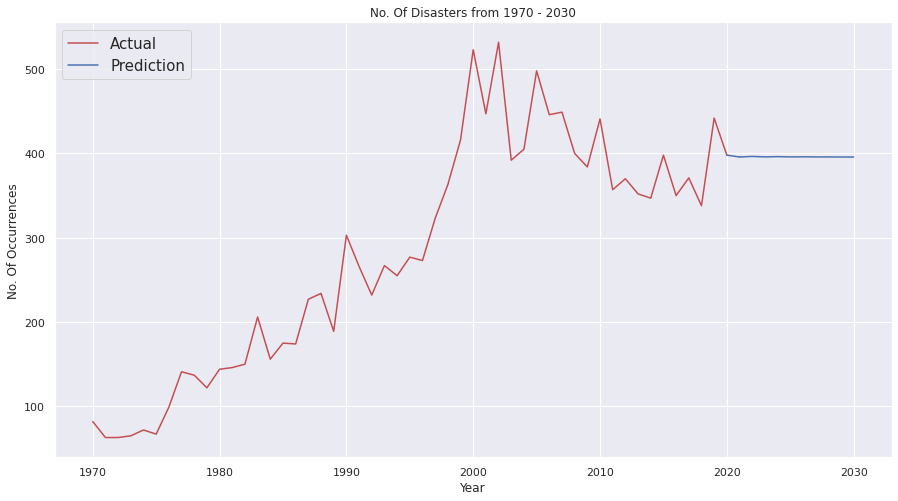

In [ ]:
# total_pred["Predicted Amount of Natural Disasters"].rename(columns={"Predicted Amount of Natural Disasters" : "No. Of Disasters"})
# pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame()
# join_line = pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0).to_frame()
# join_line

plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2030")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r')
# plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame(), 'r')
plt.plot(total_pred["Predicted Amount of Natural Disasters"], "b")
plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0), "b")

plt.legend(["Actual", "Prediction"], loc=2, prop={"size":15})
plt.show()

# Multivariate Linear Regression using CO2 and Temperature Only

In [ ]:
# co2Data_model
avg_co2 = {}
for year in range (1970, 2021):
  avg_co2[year] = co2Data_model.iloc[(co2Data_model.index >= str(year)) & (co2Data_model.index < str(year+1))].mean()

co2Data_LF = pd.DataFrame.from_dict(avg_co2, orient="index").rename(columns={"average" : "CO2 Average"})
co2Data_LF

CO2 Average
1970   325.681667
1971   326.319167
1972   327.456667
1973   329.677500
1974   330.191667
1975   331.115833
1976   332.026667
1977   333.843333
1978   335.415000
1979   336.835833
1980   338.762500
1981   340.119167
1982   341.479167
1983   343.152500
1984   344.848333
1985   346.352500
1986   347.608333
1987   349.312500
1988   351.690833
1989   353.205000
1990   354.453333
1991   355.704167
1992   356.544167
1993   357.215833
1994   358.959167
1995   360.968333
1996   362.743333
1997   363.876667
1998   366.840000
1999   368.540000
2000   369.707500
2001   371.319167
2002   373.452500
2003   375.983333
2004   377.698333
2005   379.983333
2006   382.090833
2007   384.025000
2008   385.830833
2009   387.643333
2010   390.101667
2011   391.850833
2012   394.055833
2013   396.737500
2014   398.870833
2015   401.012500
2016   404.412500
2017   406.758333
2018   408.715000
2019   411.654167
2020   414.238333

In [ ]:
# tempData_model
avg_temp = {}
for year in range (1970, 2021):
  avg_temp[year] = tempData.iloc[(tempData.index >= str(year)) & (tempData.index < str(year+1))].mean()

tempData_LF = pd.DataFrame.from_dict(avg_temp, orient="index").rename(columns={"average" : "CO2 Average"})
tempData_LF

temperature_anomaly
1970             0.025833
1971            -0.081667
1972             0.009167
1973             0.161667
1974            -0.067500
1975            -0.011667
1976            -0.095833
1977             0.178333
1978             0.068333
1979             0.165833
1980             0.260000
1981             0.322500
1982             0.140000
1983             0.314167
1984             0.156667
1985             0.118333
1986             0.180833
1987             0.321667
1988             0.390000
1989             0.271667
1990             0.450000
1991             0.406667
1992             0.220833
1993             0.234167
1994             0.315833
1995             0.447500
1996             0.328333
1997             0.462500
1998             0.607500
1999             0.382500
2000             0.391667
2001             0.535000
2002             0.627500
2003             0.615833
2004             0.533333
2005             0.675833
2006             0.635000
2007             0.661667
2008             0.540000
2009             0.653333
2010             0.718333
2011             0.604167
2012             0.645000
2013             0.674167
2014             0.744167
2015             0.895833
2016             1.015833
2017             0.922500
2018             0.845833
2019             0.977500
2020             1.019167

In [ ]:
total_LF = pd.concat([co2Data_LF, tempData_LF, disasterCountPerYear[disasterCountPerYear.index >= 1970]], axis=1)
total_LF

CO2 Average  temperature_anomaly  No. Of Disasters
1970   325.681667             0.025833                82
1971   326.319167            -0.081667                63
1972   327.456667             0.009167                63
1973   329.677500             0.161667                65
1974   330.191667            -0.067500                72
1975   331.115833            -0.011667                67
1976   332.026667            -0.095833                99
1977   333.843333             0.178333               141
1978   335.415000             0.068333               137
1979   336.835833             0.165833               122
1980   338.762500             0.260000               144
1981   340.119167             0.322500               146
1982   341.479167             0.140000               150
1983   343.152500             0.314167               206
1984   344.848333             0.156667               156
1985   346.352500             0.118333               175
1986   347.608333             0.180833               174
1987   349.312500             0.321667               227
1988   351.690833             0.390000               234
1989   353.205000             0.271667               189
1990   354.453333             0.450000               303
1991   355.704167             0.406667               266
1992   356.544167             0.220833               232
1993   357.215833             0.234167               267
1994   358.959167             0.315833               255
1995   360.968333             0.447500               277
1996   362.743333             0.328333               273
1997   363.876667             0.462500               323
1998   366.840000             0.607500               363
1999   368.540000             0.382500               416
2000   369.707500             0.391667               523
2001   371.319167             0.535000               447
2002   373.452500             0.627500               532
2003   375.983333             0.615833               392
2004   377.698333             0.533333               405
2005   379.983333             0.675833               498
2006   382.090833             0.635000               446
2007   384.025000             0.661667               449
2008   385.830833             0.540000               400
2009   387.643333             0.653333               384
2010   390.101667             0.718333               441
2011   391.850833             0.604167               357
2012   394.055833             0.645000               370
2013   396.737500             0.674167               352
2014   398.870833             0.744167               347
2015   401.012500             0.895833               398
2016   404.412500             1.015833               350
2017   406.758333             0.922500               371
2018   408.715000             0.845833               338
2019   411.654167             0.977500               442
2020   414.238333             1.019167               398

Intercept of Regression 	: b =  [-593.00556474]
Coefficients of Regression 	: a =  [[  2.20025803 198.50764589]]

            Predictors  Coefficients
0          CO2 Average      2.200258
1  temperature_anomaly    198.507646



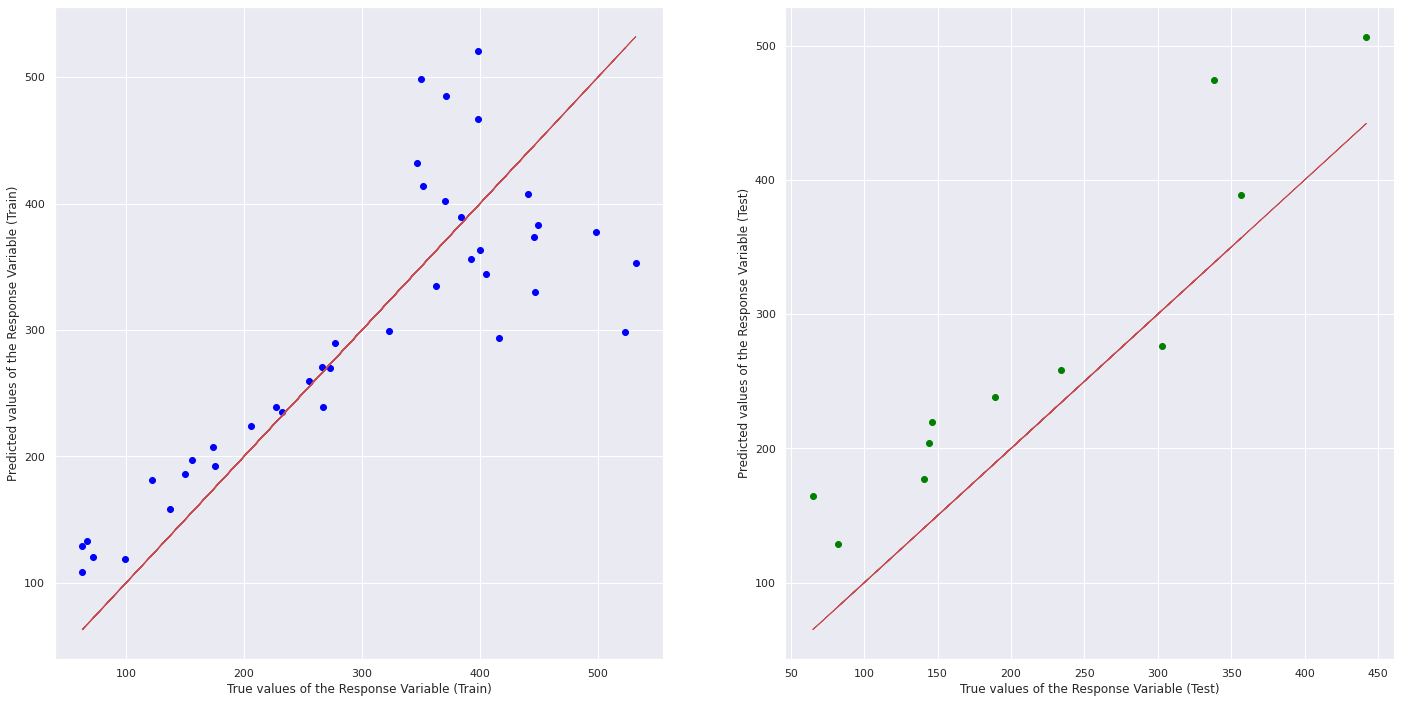

Goodness of Fit of Model 		Train Dataset
Explained Variance (R^2) 		: 0.6809136724472099
Mean Squared Error (MSE) 		: 5861.768200866161
Root Mean Squared Error (RMSE) 	: 76.5621851886828

Goodness of Fit of Model 		Test Dataset
Explained Variance (R^2) 		: 0.6690211053435802
Mean Squared Error (MSE) 		: 4529.744327914573
Root Mean Squared Error (RMSE) 	: 67.3033753084834



In [ ]:
predictors = ["CO2 Average", "temperature_anomaly"]

y = pd.DataFrame(total_LF["No. Of Disasters"])
x = pd.DataFrame(total_LF[predictors])

# split in to train test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Linear Regression using Train Data
linreg = LinearRegression() # create the linear regression object
linreg.fit(x_train, y_train) # train the linear regression model
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()
# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \t\tTrain Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \t\tTest Dataset")
print("Explained Variance (R^2) \t\t:", linreg.score(x_test, y_test))
print("Mean Squared Error (MSE) \t\t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

In [ ]:
total_pred = pd.concat([co2Data_PredAvg, tempData_PredAvg], axis=1)
total_pred

CO2 Average  temperature_anomaly
2021   415.783164             0.920804
2022   418.047540             0.941394
2023   420.311916             0.956269
2024   422.576292             0.975124
2025   424.840668             0.991229
2026   427.105044             1.009238
2027   429.369421             1.025930
2028   431.633797             1.043533
2029   433.898173             1.060506
2030   436.162549             1.077915

In [ ]:
x_pred = pd.DataFrame(total_pred[predictors])
y_pred = linreg.predict(x_pred)
y_pred

array([[504.61140919],
       [513.68079713],
       [521.61584505],
       [530.34092236],
       [538.52012521],
       [547.07727883],
       [555.37288689],
       [563.84951166],
       [572.20085843],
       [580.63890835]])

In [ ]:
total_pred = pd.concat([total_pred, pd.DataFrame(y_pred, columns = ["Predicted Amount of Natural Disasters"], index = total_pred.index)], axis=1)
total_pred

CO2 Average  temperature_anomaly  Predicted Amount of Natural Disasters
2021   415.783164             0.920804                             504.611409
2022   418.047540             0.941394                             513.680797
2023   420.311916             0.956269                             521.615845
2024   422.576292             0.975124                             530.340922
2025   424.840668             0.991229                             538.520125
2026   427.105044             1.009238                             547.077279
2027   429.369421             1.025930                             555.372887
2028   431.633797             1.043533                             563.849512
2029   433.898173             1.060506                             572.200858
2030   436.162549             1.077915                             580.638908

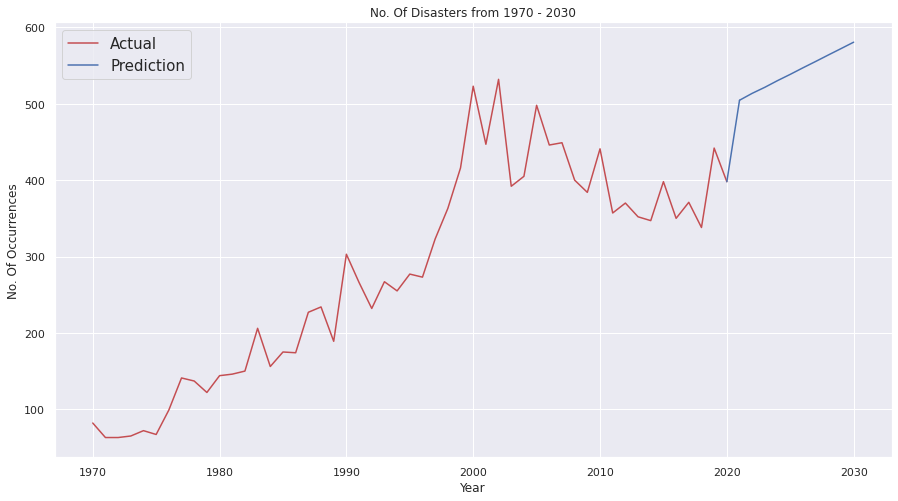

In [ ]:
plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2030")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r')
# plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters")], axis=0).to_frame(), 'r')
plt.plot(total_pred["Predicted Amount of Natural Disasters"], "b")
plt.plot(pd.concat([disasterCountPerYear['No. Of Disasters'].iloc[-1:], total_pred["Predicted Amount of Natural Disasters"].rename("No. Of Disasters").iloc[:1]], axis=0), "b")

plt.legend(["Actual", "Prediction"], loc=2, prop={"size":15})
plt.show()